# Incorporando Análisis de Hofstede en GED

Este notebook trabaja con los datos originados por la iniciativa iGEDS, en particular datos a nivel internacional de 106 países que describen 5 pilares principales:

*   Foundational Institutions
*   Innovation capability
*   Entrepreneurship capability
*   Comparative Advantage
*   Social Impact
*   Economic Impact

Sumado a esto, se incorpora la información de 80 países correspondiente en el análisis antropológico de Hofstede, en el cual se comparan los valores culturales de distintos países con base en un análisis estadístico de las respuestas a un instrumento, o encuesta, que se enfoca en 6 dimensiones:

*   Individualism vs. Collectivism
*   Uncertainty avoidance
*   Power distance ~ strength of social hierarchy
*   Masculinity vs. Feminity
*   Long term orientation
*   Indulgence vs. Self restraint

En este código se realiza lo siguiente

-   Re-escalan todas las métricas a valores entre 1-5 
-   Imputan valores faltantes para algunos paises 
-   Visualiza la distribución de las métricas por país.

## Parte 1: Importe de paquetes de Python, y de Datos 

In [98]:
! pip install pingouin
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import scipy.stats as stats

import networkx as nx

Importe de datos originales:

In [99]:
data = pd.read_csv('iEcosystems + Hofstede (106 countries dataset) - Indicators.csv')
data.rename(columns={"Long Term Orientation versus Short Term Normative Orientation (LTO)":"Long Term Orientation (LTO)"}, inplace=True)
#data

## Parte 2: Obtención del Tidy DataFrame

En esta parte obtendremos el **tidy** dataframe, el cual contiene: una característica por columna y una observación por fila. Comenzamos removiendo los valores más altos y bajos, y asignamos el nombre del país como índice: 

In [100]:
minimums = data.iloc[106,3:].astype(float).values
maximums = data.iloc[107,3:].astype(float).values
df = data.drop(axis=0, index=[106,107])
df.set_index('Country', inplace=True)
df

Region  \
Country                                                   
Albania                         Europe and Central Asia   
Algeria                    Middle East and North Africa   
Argentina               Latin America and the Caribbean   
Armenia                         Europe and Central Asia   
Australia                         East Asia and Pacific   
Austria                         Europe and Central Asia   
Azerbaijan                      Europe and Central Asia   
Bangladesh                                   South Asia   
Belgium                         Europe and Central Asia   
Bosnia and Herzegovina          Europe and Central Asia   
Brazil                  Latin America and the Caribbean   
Bulgaria                        Europe and Central Asia   
Burundi                              Sub-Saharan Africa   
Cambodia                          East Asia and Pacific   
Cameroon                             Sub-Saharan Africa   
Canada                                    North America   
Chile                   Latin America and the Caribbean   
China                             East Asia and Pacific   
Colombia                Latin America and the Caribbean   
Costa Rica              Latin America and the Caribbean   
Croatia                         Europe and Central Asia   
Cyprus                          Europe and Central Asia   
Czech Republic                  Europe and Central Asia   
Denmark                         Europe and Central Asia   
Dominican Republic      Latin America and the Caribbean   
Ecuador                 Latin America and the Caribbean   
Egypt, Arab Rep.           Middle East and North Africa   
El Salvador             Latin America and the Caribbean   
Estonia                         Europe and Central Asia   
Ethiopia                             Sub-Saharan Africa   
Finland                         Europe and Central Asia   
France                          Europe and Central Asia   
Georgia                         Europe and Central Asia   
Germany                         Europe and Central Asia   
Ghana                                Sub-Saharan Africa   
Greece                          Europe and Central Asia   
Guatemala               Latin America and the Caribbean   
Honduras                Latin America and the Caribbean   
Hungary                         Europe and Central Asia   
Iceland                         Europe and Central Asia   
India                                        South Asia   
Indonesia                         East Asia and Pacific   
Iran, Islamic Rep.         Middle East and North Africa   
Ireland                         Europe and Central Asia   
Israel                     Middle East and North Africa   
Italy                           Europe and Central Asia   
Japan                             East Asia and Pacific   
Jordan                     Middle East and North Africa   
Kazakhstan                      Europe and Central Asia   
Kenya                                Sub-Saharan Africa   
Korea, Rep.                       East Asia and Pacific   
Kuwait                     Middle East and North Africa   
Kyrgyz Republic                 Europe and Central Asia   
Latvia                          Europe and Central Asia   
Lebanon                    Middle East and North Africa   
Lithuania                       Europe and Central Asia   
Luxembourg                      Europe and Central Asia   
Madagascar                           Sub-Saharan Africa   
Malaysia                          East Asia and Pacific   
Mali                                 Sub-Saharan Africa   
Malta                      Middle East and North Africa   
Mauritius                            Sub-Saharan Africa   
Mexico                  Latin America and the Caribbean   
Moldova                         Europe and Central Asia   
Mongolia                          East Asia and Pacific   
Montenegro                      Europe and Central Asia   
Morocco                    Middle Eas

Proceso de re-escalamiento:

In [101]:
df_scaled = df.copy()
df_scaled = df_scaled.drop('Region', axis=1)
df_scaled = df_scaled.drop('Development Stage', axis=1)

columns = df_scaled.columns.values.tolist()

for column, minval, maxval in zip(columns, minimums, maximums):
    df_scaled[column] = df_scaled[column].apply(lambda x: (x-minval)/(maxval-minval))
    df_scaled[column] = df_scaled[column].apply(lambda x: 1+4*x)


df_scaled

1.01 Ease of doing business (WB)  \
Country                                                    
Albania                                            3.708   
Algeria                                            2.944   
Argentina                                          3.360   
Armenia                                            3.980   
Australia                                          4.248   
Austria                                            4.148   
Azerbaijan                                         4.068   
Bangladesh                                         2.800   
Belgium                                            4.000   
Bosnia and Herzegovina                             3.616   
Brazil                                             3.364   
Bulgaria                                           3.880   
Burundi                                            2.872   
Cambodia                                           3.152   
Cameroon                                           2.844   
Canada                                             4.184   
Chile                                              3.904   
China                                              4.116   
Colombia                                           3.804   
Costa Rica                                         3.768   
Croatia                                            3.944   
Cyprus                                             3.936   
Czech Republic                                     4.052   
Denmark                                            4.412   
Dominican Republic                                 3.400   
Ecuador                                            3.308   
Egypt, Arab Rep.                                   3.404   
El Salvador                                        3.612   
Estonia                                            4.224   
Ethiopia                                           2.920   
Finland                                            4.208   
France                                             4.072   
Georgia                                            4.348   
Germany                                            4.188   
Ghana                                              3.400   
Greece                                             3.736   
Guatemala                                          3.504   
Honduras                                           3.252   
Hungary                                            3.936   
Iceland                                            4.160   
India                                              3.840   
Indonesia                                          3.784   
Iran, Islamic Rep.                                 3.340   
Ireland                                            4.184   
Israel                                             4.068   
Italy                                              3.916   
Japan                                              4.120   
Jordan                                             3.760   
Kazakhstan                                         4.184   
Kenya                                              3.928   
Korea, Rep.                                        4.360   
Kuwait                                             3.696   
Kyrgyz Republic                                    3.712   
Latvia                                             4.212   
Lebanon                                            3.172   
Lithuania                                          4.264   
Luxembourg                                         3.784   
Madagascar                                         2.908   
Malaysia                                           4.260   
Mali                                               3.116   
Malta                                              3.644   
Mauritius                                          4.260   
Mexico                                             3.896   
Moldova                                            3.976   
Mongolia                                           3.712   
Mont

In [102]:
sum(list(df.isnull().sum()))

886

Con esto tenemos los datos re-escalados del 1-5. Aún así, algunas entradas tienen valores faltantes, dichos valores se van a inferir con la técnica de **K-vecinos cercanos**, considerando los 5 vecinos más cercanos. Total de valores faltantes: 886.

In [103]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
var = imputer.fit_transform(df_scaled)
df_imputed = pd.DataFrame(var)
var = np.where(var>5,5,var)      #adjust values to 5 or 1 when these are out of bounds
var = np.where(var<1,1,var)

df_imputed.columns = columns
df_imputed.index = df_scaled.index
#pd.set_option('max_columns', None, 'max_rows', None)
df_imputed.head()

1.01 Ease of doing business (WB)  1.02 Starting a business (WB)  \
Country                                                                      
Albania                               3.708                          4.672   
Algeria                               2.944                          4.120   
Argentina                             3.360                          4.216   
Armenia                               3.980                          4.844   
Australia                             4.248                          4.864   

           1.03 Paying taxes (WB)  1.04 Resolving Insolvency (WB)  \
Country                                                             
Albania                     3.608                           3.708   
Algeria                     3.156                           2.968   
Argentina                   2.972                           2.600   
Armenia                     4.260                           2.784   
Australia                   4.428                           4.156   

           1.05 Enforcing contracts (WB)  1.06 Property Rights (IEF)  \
Country                                                                
Albania                            3.140                       3.284   
Algeria                            3.192                       2.516   
Argentina                          3.300                       3.020   
Armenia                            3.788                       3.428   
Australia                          4.160                       4.312   

           1.07 Government Integrity (IEF)  1.08 Labor Freedom (IEF)  \
Country                                                                
Albania                              2.552                     3.084   
Algeria                              2.132                     3.020   
Argentina                            2.988                     2.860   
Armenia                              2.736                     3.900   
Australia                            4.572                     4.360   

           1.09 Trade freedom (IEF)  1.10 Corruption Perceptions Index (TI)  \
Country                                                                       
Albania                       4.536                                    2.44   
Algeria                       3.648                                    2.40   
Argentina                     3.768                                    2.60   
Armenia                       4.224                                    2.40   
Australia                     4.528                                    4.08   

           2.01a Percentage of adults with a doctoral or equivalent level of education (OECD)  \
Country                                                                                         
Albania                                             1.464935                                    
Algeria                                             1.464935                                    
Argentina                                           1.272727                                    
Armenia                                             1.381818                                    
Australia                                           2.415584                                    

           2.01b Skillset of graduates (GCI 4.0)  \
Country                                            
Albania                                   3.1964   
Algeria                                   2.7920   
Argentina                                 3.1212   
Armenia                                   2.7816   
Australia                                 3.5516   

           2.01c Ease of finding skilled employees (GCI 4.0)  \
Country                                                        
Albania                                               2.9276   
Algeria                                               3.0812   
Argentina                                             3.1240   
Armenia                                            

In [104]:
sum(list(df_imputed.isnull().sum()))

0

In [105]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
df_imputed

1.01 Ease of doing business (WB)  \
Country                                                    
Albania                                            3.708   
Algeria                                            2.944   
Argentina                                          3.360   
Armenia                                            3.980   
Australia                                          4.248   
Austria                                            4.148   
Azerbaijan                                         4.068   
Bangladesh                                         2.800   
Belgium                                            4.000   
Bosnia and Herzegovina                             3.616   
Brazil                                             3.364   
Bulgaria                                           3.880   
Burundi                                            2.872   
Cambodia                                           3.152   
Cameroon                                           2.844   
Canada                                             4.184   
Chile                                              3.904   
China                                              4.116   
Colombia                                           3.804   
Costa Rica                                         3.768   
Croatia                                            3.944   
Cyprus                                             3.936   
Czech Republic                                     4.052   
Denmark                                            4.412   
Dominican Republic                                 3.400   
Ecuador                                            3.308   
Egypt, Arab Rep.                                   3.404   
El Salvador                                        3.612   
Estonia                                            4.224   
Ethiopia                                           2.920   
Finland                                            4.208   
France                                             4.072   
Georgia                                            4.348   
Germany                                            4.188   
Ghana                                              3.400   
Greece                                             3.736   
Guatemala                                          3.504   
Honduras                                           3.252   
Hungary                                            3.936   
Iceland                                            4.160   
India                                              3.840   
Indonesia                                          3.784   
Iran, Islamic Rep.                                 3.340   
Ireland                                            4.184   
Israel                                             4.068   
Italy                                              3.916   
Japan                                              4.120   
Jordan                                             3.760   
Kazakhstan                                         4.184   
Kenya                                              3.928   
Korea, Rep.                                        4.360   
Kuwait                                             3.696   
Kyrgyz Republic                                    3.712   
Latvia                                             4.212   
Lebanon                                            3.172   
Lithuania                                          4.264   
Luxembourg                                         3.784   
Madagascar                                         2.908   
Malaysia                                           4.260   
Mali                                               3.116   
Malta                                              3.644   
Mauritius                                          4.260   
Mexico                                             3.896   
Moldova                                            3.976   
Mongolia                                           3.712   
Mont

## Parte 3: DataFrame organizado por pilares

Tenemos los datos limpios, re-escalados, sin valores faltantes. Podemos ahora podemos reorganizar nuestros datos como sigue: tomaremos registro del pilar al que corresponde cada métrica de iEcosystems.

Consideramos cada una de las dimensiones de Hofstede como pilar en este proceso de reorganización.

In [106]:
hofstede_pillars = ['Power Distance Index (PDI)',
            'Individualism versus Collectivism (IDV)', 
            'Masculinity versus Feminity (MAS)',
            'Uncertainty Avoidance Index (UAI)',
            'Long Term Orientation (LTO)', 
            'Indulgence versus Restraint (IVR)']

In [107]:
df_means = df_imputed.T

pillars = pd.read_excel('https://github.com/NunezKant/iGEDS/blob/master/iEcosystems%20(106%20countries%20dataset).xlsx?raw=true', decimal = ',', sheet_name=1)
pillars = pillars['Pillar'].values
pillars = np.append(pillars, hofstede_pillars, axis=0)

df_means['Pillars'] = pillars
df_means

Country                                              Albania   Algeria  \
1.01 Ease of doing business (WB)                    3.708000  2.944000   
1.02 Starting a business (WB)                       4.672000  4.120000   
1.03 Paying taxes (WB)                              3.608000  3.156000   
1.04 Resolving Insolvency (WB)                      3.708000  2.968000   
1.05 Enforcing contracts (WB)                       3.140000  3.192000   
1.06 Property Rights (IEF)                          3.284000  2.516000   
1.07 Government Integrity (IEF)                     2.552000  2.132000   
1.08 Labor Freedom (IEF)                            3.084000  3.020000   
1.09 Trade freedom (IEF)                            4.536000  3.648000   
1.10 Corruption Perceptions Index (TI)              2.440000  2.400000   
2.01a Percentage of adults with a doctoral or e...  1.464935  1.464935   
2.01b Skillset of graduates (GCI 4.0)               3.196400  2.792000   
2.01c Ease of finding skilled employees (GCI 4.0)   2.927600  3.081200   
2.01d Researchers/Professionals engaged in R&D ...  1.068000  1.392000   
2.01e STEM Graduates per capita (OECD) - Natura...  2.381232  2.229897   
2.02a R&D expenditure as a % GDP (UNESCO)           1.357475  1.430297   
2.02b R&D expenditure in '000 current PPP$ (UNE...  1.002430  1.024607   
2.02c Public R&D Expenditure as % of GDP (UNESCO)   1.748936  3.212766   
2.02d Business R&D Expenditure as % GDP (UNESCO)    1.241039  1.031169   
2.03a Internet Bandwidth (GCI)                      1.045038  1.031214   
2.03b Production Process Sophistication (GCI)       2.986667  2.526667   
2.03c Availability of latest technologies (GCI)     3.240000  2.853333   
2.03d ICT access (GII)                              3.124000  3.124000   
2.04a Government procurement of advanced techno...  2.933333  2.340000   
2.04b University-industry research collaboratio...  2.552000  2.076000   
2.04c Trade, Competition & Market scale (GII)       3.304000  3.304000   
2.05a Research institutions prominence (GCI 4.0)    1.000000  1.391200   
2.05b Graduates in science & engineering (%) (GII)  2.132000  3.464000   
3.01a Entrepreneurship perceived capabilities (...  4.068221  3.869464   
3.01b % school grads in tertiary education (GII)    2.788000  2.496000   
3.02a VC investment (WEF)                           1.099796  1.258656   
3.02b Financing of SME's (GCI 4.0)                  2.905200  2.878000   
3.02c Venture Capital Availability (GCI 4.0)        2.342800  2.656400   
3.02d Ease of Credit (GII)                          3.800000  1.400000   
3.02e VC deals (GII)                                1.122400  1.217600   
3.02f Venture Capital Deal Volume (WEF)             1.000581  1.022620   
3.03a Logistics performance (WB)                    2.620000  2.560000   
3.03b Electricity (GCI 4.0)                         4.701200  4.751200   
3.03c ICT Adoption (GCI 4.0)                        3.115200  3.108800   
3.04a Buyer sophistication (GCI 4.0)                2.382000  2.855600   
3.04b Domestic Market Scale (GII)                   2.356000  3.556000   
3.05a Entrepreneurial intentions (GEM)              2.986303  3.244305   
3.05b Fear of failure (GEM)                         2.715583  3.082384   
3.05c Entrepreneurship as a Good Career choice ...  3.457184  3.498782   
3.05d High Status to Successful Entrepreneurs (...  3.451638  4.021330   
3.05e Business Freedom (IEF)                        3.628000  3.520000   
3.05f Attitudes towards Entrepreneurial Risk (G...  2.560400  2.739600   
4.01 State of cluster development (GCI 4.0)         2.215600  2.931600   
4.02 Country capacity to attract and retain tal...  1.933333  1.866667   
5.01 Social Progress Index (SPI)                    3.862800  3.682400   
5.02 Inclusive Development Index (IDI)              3.053333  3.146667   
5.03 Population below international poverty lin...  4.942559  4.973890   
5.04 Prevalence of undernourishment (SDG 2 - Ze...  4.704433  4.783251   
5.05

Tomaremos la media por pilar de cada país. 

In [108]:
df_means = df_means.groupby('Pillars').mean().T
df_means

Pillars                 1 Foundational Institutions  2.01 I-Human Capital  \
Country                                                                     
Albania                                      3.4732              2.207633   
Algeria                                      3.0096              2.192006   
Argentina                                    3.1684              2.021985   
Armenia                                      3.6344              2.187459   
Australia                                    4.3708              2.878032   
Austria                                      4.2012              3.558083   
Azerbaijan                                   3.6492              2.420113   
Bangladesh                                   2.8376              2.202120   
Belgium                                      4.1252              2.842009   
Bosnia and Herzegovina                       3.3336              2.386606   
Brazil                                       3.1780              1.826706   
Bulgaria                                     3.6376              2.463048   
Burundi                                      2.8960              2.217192   
Cambodia                                     2.8140              2.087208   
Cameroon                                     2.7840              2.126067   
Canada                                       4.2880              3.046135   
Chile                                        3.9124              2.399177   
China                                        3.6712              2.648270   
Colombia                                     3.4952              2.327141   
Costa Rica                                   3.5328              2.075950   
Croatia                                      3.6684              2.334987   
Cyprus                                       3.8484              2.756561   
Czech Republic                               3.9612              2.787521   
Denmark                                      4.4720              3.467136   
Dominican Republic                           3.1700              2.023675   
Ecuador                                      2.9608              2.091845   
Egypt, Arab Rep.                             3.0976              2.024195   
El Salvador                                  3.2408              1.942325   
Estonia                                      4.1516              2.953533   
Ethiopia                                     2.9776              2.240433   
Finland                                      4.3352              3.821135   
France                                       4.0636              3.117018   
Georgia                                      4.0400              2.184750   
Germany                                      4.1688              3.901982   
Ghana                                        3.1168              2.161587   
Greece                                       3.5172              2.967140   
Guatemala                                    3.0580              2.093940   
Honduras                                     2.8860              2.057978   
Hungary                                      3.7100              2.495105   
Iceland                                      4.2348              3.260221   
India                                        3.3568              2.661231   
Indonesia                                    3.4352              2.183334   
Iran, Islamic Rep.                           2.9312              2.033828   
Ireland                                      4.2416              3.264304   
Israel                                       4.0524              3.431464   
Italy                                        3.7248              2.719173   
Japan                                        4.2000              2.968780   
Jordan                                       3.4984              2.322609   
Kazakhstan                                   3.7984              2.330467   
Kenya                                        3.3360              2.349128

## Parte 4: Correlaciones de los promedios de pilares

Ahora podemos obtener la matriz de correlación, a partir de la cual podemos plantear preguntas acerca de cómo se relacionan los diferentes pilares que estamos estudiando. 

Primero que nada, nuestras principales herramientas:

*   `significant_corr`: para cualesquiera dos columnas obtiene su correlación Pearson
*   `print_significant_corr`: si la correlación es estadísticamente significativa, imprime dicha información y grafica el conjunto de datos evaluado en estos dos pilares

In [109]:
def significant_corr(df1,df2,a,b):
    '''
    This function computed the pearson correlation between two data sets a, b, 
    and determines whether this correlation is significant or not. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - b    : a data vector
    
    Output : a tuple (B,N) where B is a boolean that answers the question:
    ~do a and b present significant correlation? i.e. p-value<0.1,
    and N=0 is B=False, or N=p-val(a,b) if B=True
    '''
    if df2.empty:
        df2=df1
    r = stats.pearsonr(df1[a], df2[b])
    if r[1] < 0.05:
        return (True, r[0], r[1])
    else:
        return (False, r[0], r[1])
    
    
    

def print_significant_corr(df1,df2,a,b):
    '''
    This function computes the Pearson correlation between two data sets a, b, 
    and prints whether this correlation is significant or not, and the 
    corresponding Pearson correlation and p-value. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - b    : a data vector
    
    Output : None, but executes print statements showing the findings about aand b.
    '''
    if df2.empty:
        df2=df1
    r = stats.pearsonr(df1[a], df2[b])
    print(f'Correlation between:  ' + a + '   and   ' + b)
    print('**********************************************')
    print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
    
    if r[1] < 0.05:
        print('*Statistically significant*')
        print('***********************************************')
        print('')
        sns.lmplot(x=b, y=a, data=df1)
        return True, r[0], r[1]
    
    else:
        print('Not significant')
        print('**********************************************')
        print('')
        sns.lmplot(x=b, y=a, data=df1)
        return False, r[0], r[1]
    

Nos interesa como se relacionan las métricas con las variables de salida:

*   4 Comparative Advantage
*   5 Impact

Primero obtenemos la matriz de correlaciones y la representamos visualmente por medio de un Heatmap:

In [110]:
corr = df_means.corr()

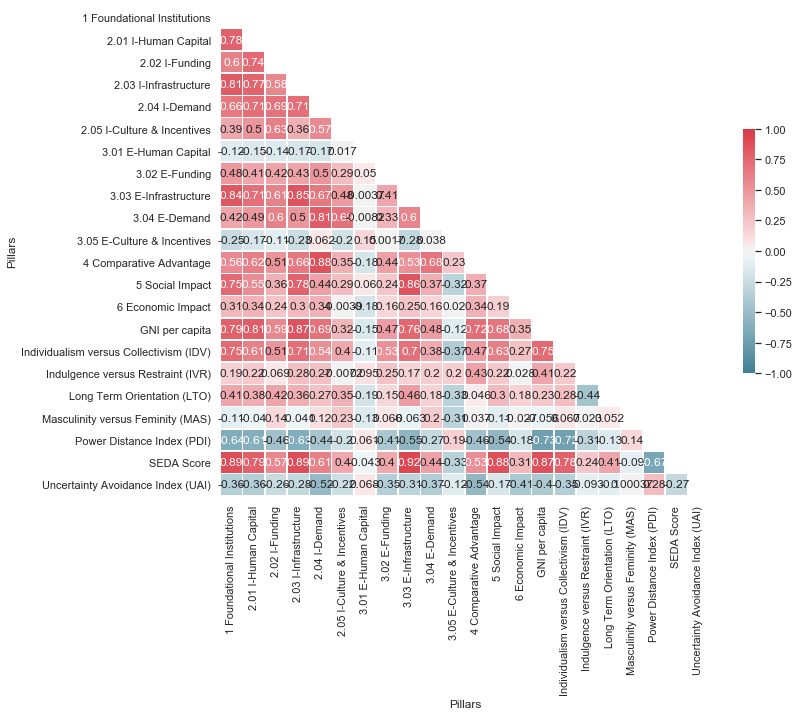

In [111]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Parte 5: Unificación de Pilares de Innovación y de Emprendimiento

Los pilares de capacidades de Innovación (2) y Emprendimiento (3) son el enfoque de esta parte del código. En particular nos interesa ver qué sucede al unificar cada uno de estos pilares, por separado, y qué sucede cuando unificamos los dos pilares. 

In [112]:
i_e_unified = df_means.T.copy()

#building i_e_unified
pillars_L = ['1 Foundational Institutions']
pillars_L += ['2 Innovation Capacity']*5 
pillars_L += ['3 Entrepreneurship Capacity']*5 
pillars_L += ['4 Comparative Advantage', 
                          '5 Social Impact',
                          '6 Economic Impact',
                          'GNI per capita' ,
                          '8 SEDA Score']
pillars_L += hofstede_pillars
i_e_unified['Pillar'] = pillars_L
i_e_unified = i_e_unified.groupby('Pillar').mean().T

#column unifying I&E capacity - each of these pilars contains 5 components
combined_L=[]
for i in range(len(i_e_unified['2 Innovation Capacity'])):
    icap = i_e_unified['2 Innovation Capacity'][i]
    ecap = i_e_unified['3 Entrepreneurship Capacity'][i]
    combined_L.append(0.5*icap + 0.5*ecap)
i_e_unified['2&3 I&E Capacity'] = combined_L
i_e_unified



#column unifying I&E capacity - each of these pilars contains 5 components
combined_L=[]
for i in range(len(i_e_unified['5 Social Impact'])):
    socim = i_e_unified['5 Social Impact'][i]
    ecoim = i_e_unified['6 Economic Impact'][i]
    combined_L.append(0.5*socim + 0.5*ecoim)
i_e_unified['5&6 Impact'] = combined_L
i_e_unified


Pillar                  1 Foundational Institutions  2 Innovation Capacity  \
Country                                                                      
Albania                                      3.4732               2.127962   
Algeria                                      3.0096               2.250291   
Argentina                                    3.1684               2.193493   
Armenia                                      3.6344               2.096699   
Australia                                    4.3708               2.871491   
Austria                                      4.2012               3.139513   
Azerbaijan                                   3.6492               2.366238   
Bangladesh                                   2.8376               1.947387   
Belgium                                      4.1252               2.888541   
Bosnia and Herzegovina                       3.3336               2.042833   
Brazil                                       3.1780               2.368433   
Bulgaria                                     3.6376               2.301623   
Burundi                                      2.8960               1.809978   
Cambodia                                     2.8140               1.927795   
Cameroon                                     2.7840               1.969724   
Canada                                       4.2880               2.966741   
Chile                                        3.9124               2.320720   
China                                        3.6712               3.342821   
Colombia                                     3.4952               2.227322   
Costa Rica                                   3.5328               2.078878   
Croatia                                      3.6684               2.263802   
Cyprus                                       3.8484               2.232651   
Czech Republic                               3.9612               2.729459   
Denmark                                      4.4720               2.933120   
Dominican Republic                           3.1700               1.880233   
Ecuador                                      2.9608               1.973500   
Egypt, Arab Rep.                             3.0976               2.081917   
El Salvador                                  3.2408               1.946617   
Estonia                                      4.1516               2.591578   
Ethiopia                                     2.9776               2.001493   
Finland                                      4.3352               3.191599   
France                                       4.0636               3.284149   
Georgia                                      4.0400               2.103173   
Germany                                      4.1688               3.850306   
Ghana                                        3.1168               1.995515   
Greece                                       3.5172               2.562598   
Guatemala                                    3.0580               1.945908   
Honduras                                     2.8860               1.893605   
Hungary                                      3.7100               2.449168   
Iceland                                      4.2348               2.679005   
India                                        3.3568               3.052333   
Indonesia                                    3.4352               2.317123   
Iran, Islamic Rep.                           2.9312               2.671412   
Ireland                                      4.2416               2.740763   
Israel                                       4.0524               3.211560   
Italy                                        3.7248               2.894324   
Japan                                        4.2000               3.488395   
Jordan                                       3.4984               2.345778   
Kazakhstan                                   3.7984               2.201517   
Kenya                 

Obtención de la matriz de correlaciones y la visualización por medio de un Heatmap:

In [113]:
corr = i_e_unified.corr()

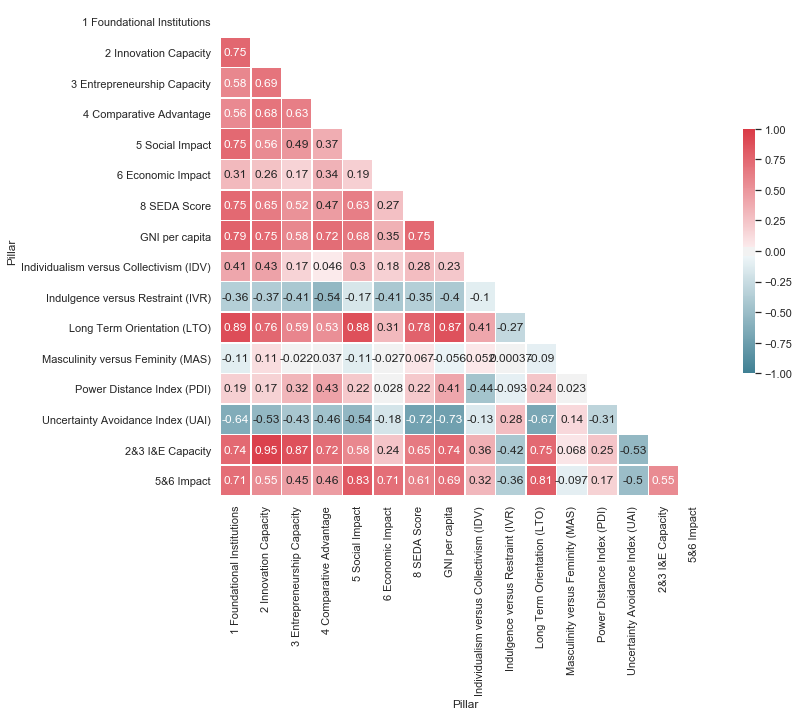

In [114]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(10, 190, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Para completar la lectura del Heatmap anteriormente presentado, enlistamos la lista de aquellas parejas de columnas del DataFrame `i_e_unified` que tienen una correlación significativa. 

********
Power Distance Index (PDI)
********
Correlation between:  Power Distance Index (PDI)   and   1 Foundational Institutions
**********************************************
Pearson Correlation: 0.1948041189633967, p-value: 0.04538542327580034
*Statistically significant*
***********************************************




Correlation between:  Power Distance Index (PDI)   and   3 Entrepreneurship Capacity
**********************************************
Pearson Correlation: 0.3216349288074057, p-value: 0.000773885376692778
*Statistically significant*
***********************************************




Correlation between:  Power Distance Index (PDI)   and   4 Comparative Advantage
**********************************************
Pearson Correlation: 0.4345444326993356, p-value: 3.2514120009786198e-06
*Statistically significant*
***********************************************




Correlation between:  Power Distance Index (PDI)   and   5 Social Impact
************************************

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Uncertainty Avoidance Index (UAI)   and   3 Entrepreneurship Capacity
**********************************************
Pearson Correlation: -0.4252681200882702, p-value: 5.515768098419369e-06
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Uncertainty Avoidance Index (UAI)   and   4 Comparative Advantage
**********************************************
Pearson Correlation: -0.4607719618142016, p-value: 6.687620333990404e-07
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Uncertainty Avoidance Index (UAI)   and   5 Social Impact
**********************************************
Pearson Correlation: -0.5447348615227983, p-value: 1.5744164983988523e-09
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Uncertainty Avoidance Index (UAI)   and   8 SEDA Score
**********************************************
Pearson Correlation: -0.7164048812346738, p-value: 5.94262459080585e-18
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Uncertainty Avoidance Index (UAI)   and   GNI per capita
**********************************************
Pearson Correlation: -0.7271328491270505, p-value: 1.0904103249183524e-18
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Uncertainty Avoidance Index (UAI)   and   Indulgence versus Restraint (IVR)
**********************************************
Pearson Correlation: 0.28377080124850423, p-value: 0.0032003637013610004
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Uncertainty Avoidance Index (UAI)   and   Long Term Orientation (LTO)
**********************************************
Pearson Correlation: -0.6724124449353339, p-value: 2.956594346318602e-15
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Uncertainty Avoidance Index (UAI)   and   Power Distance Index (PDI)
**********************************************
Pearson Correlation: -0.3058973477525016, p-value: 0.0014283124437451955
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Uncertainty Avoidance Index (UAI)   and   2&3 I&E Capacity
**********************************************
Pearson Correlation: -0.5343033194131547, p-value: 3.661159047204245e-09
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Uncertainty Avoidance Index (UAI)   and   5&6 Impact
**********************************************
Pearson Correlation: -0.4952623676663871, p-value: 6.76782830608693e-08
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





********
Long Term Orientation (LTO)
********
Correlation between:  Long Term Orientation (LTO)   and   1 Foundational Institutions
**********************************************
Pearson Correlation: 0.8937015736487296, p-value: 5.492319086045154e-38
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   2 Innovation Capacity
**********************************************
Pearson Correlation: 0.755988705043999, p-value: 7.435146215748843e-21
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   3 Entrepreneurship Capacity
**********************************************
Pearson Correlation: 0.5868176311674478, p-value: 3.8297411079516444e-11
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   4 Comparative Advantage
**********************************************
Pearson Correlation: 0.5343495311745242, p-value: 3.647727290783256e-09
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   5 Social Impact
**********************************************
Pearson Correlation: 0.8813738398457613, p-value: 1.1916252857289151e-35
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   6 Economic Impact
**********************************************
Pearson Correlation: 0.30946827489842055, p-value: 0.0012465000150067554
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   8 SEDA Score
**********************************************
Pearson Correlation: 0.7759600064400196, p-value: 1.5393127291059337e-22
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   GNI per capita
**********************************************
Pearson Correlation: 0.8690675071897228, p-value: 1.4553726740658517e-33
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   Individualism versus Collectivism (IDV)
**********************************************
Pearson Correlation: 0.41034333102838194, p-value: 1.2501449845499288e-05
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   Indulgence versus Restraint (IVR)
**********************************************
Pearson Correlation: -0.27459078504926243, p-value: 0.004392111537867173
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   Power Distance Index (PDI)
**********************************************
Pearson Correlation: 0.24020445295514606, p-value: 0.013132386883141813
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   Uncertainty Avoidance Index (UAI)
**********************************************
Pearson Correlation: -0.6724124449353339, p-value: 2.956594346318602e-15
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   2&3 I&E Capacity
**********************************************
Pearson Correlation: 0.7498790716792227, p-value: 2.261903801615538e-20
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Long Term Orientation (LTO)   and   5&6 Impact
**********************************************
Pearson Correlation: 0.8104740644946686, p-value: 6.691061628324855e-26
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





********
Indulgence versus Restraint (IVR)
********
Correlation between:  Indulgence versus Restraint (IVR)   and   1 Foundational Institutions
**********************************************
Pearson Correlation: -0.3554215707794067, p-value: 0.00018494169005401148
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Indulgence versus Restraint (IVR)   and   2 Innovation Capacity
**********************************************
Pearson Correlation: -0.3713269628940536, p-value: 8.899600693922164e-05
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Indulgence versus Restraint (IVR)   and   3 Entrepreneurship Capacity
**********************************************
Pearson Correlation: -0.41252969010525453, p-value: 1.1116200453414465e-05
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Indulgence versus Restraint (IVR)   and   4 Comparative Advantage
**********************************************
Pearson Correlation: -0.5373569115571073, p-value: 2.868295322628058e-09
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Indulgence versus Restraint (IVR)   and   6 Economic Impact
**********************************************
Pearson Correlation: -0.4134510247776551, p-value: 1.0576847274060954e-05
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Indulgence versus Restraint (IVR)   and   8 SEDA Score
**********************************************
Pearson Correlation: -0.3537355247217615, p-value: 0.00019940905968937508
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Indulgence versus Restraint (IVR)   and   GNI per capita
**********************************************
Pearson Correlation: -0.4024099876592914, p-value: 1.9013554359985948e-05
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Indulgence versus Restraint (IVR)   and   Long Term Orientation (LTO)
**********************************************
Pearson Correlation: -0.27459078504926243, p-value: 0.004392111537867173
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Indulgence versus Restraint (IVR)   and   Uncertainty Avoidance Index (UAI)
**********************************************
Pearson Correlation: 0.28377080124850423, p-value: 0.0032003637013610004
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Indulgence versus Restraint (IVR)   and   2&3 I&E Capacity
**********************************************
Pearson Correlation: -0.4191027793745167, p-value: 7.770600427824876e-06
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)





Correlation between:  Indulgence versus Restraint (IVR)   and   5&6 Impact
**********************************************
Pearson Correlation: -0.35690957100659093, p-value: 0.0001729877361560082
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


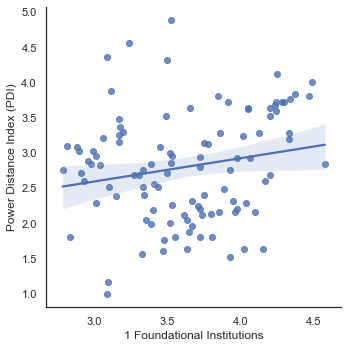

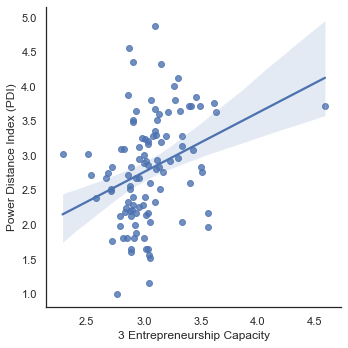

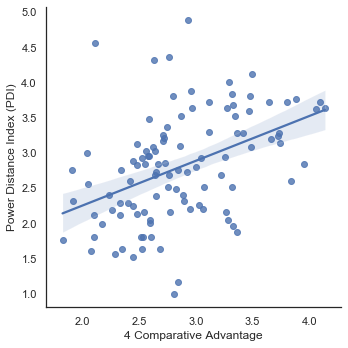

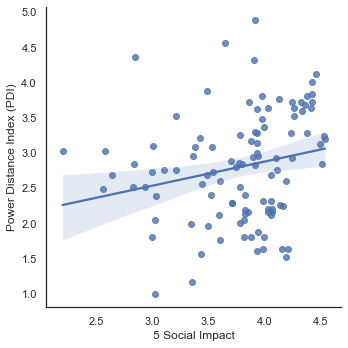

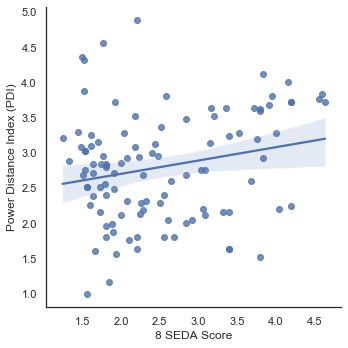

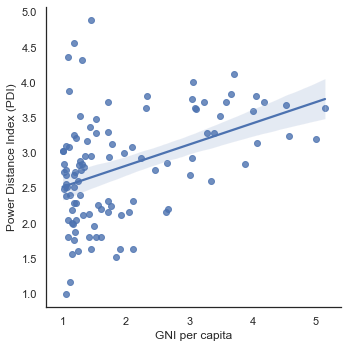

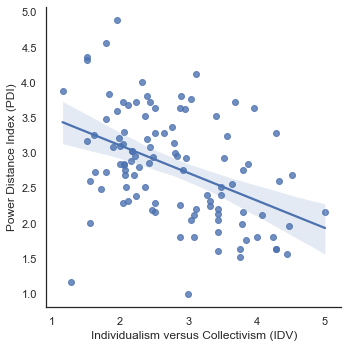

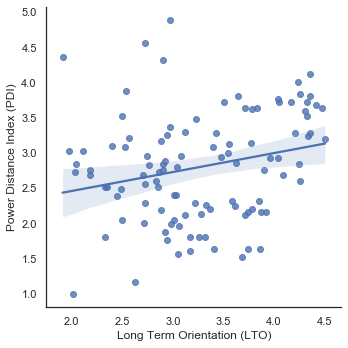

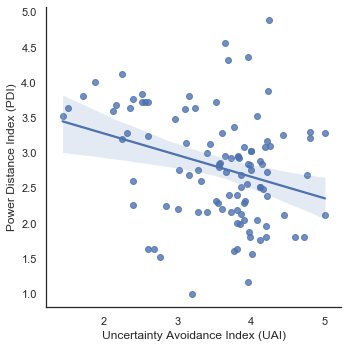

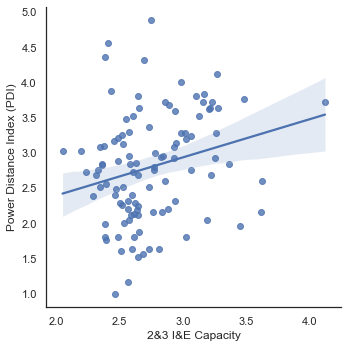

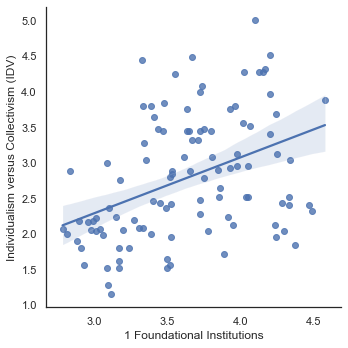

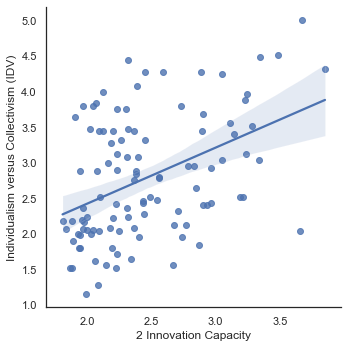

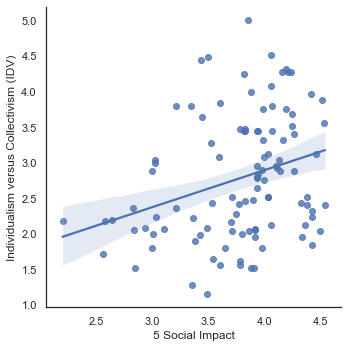

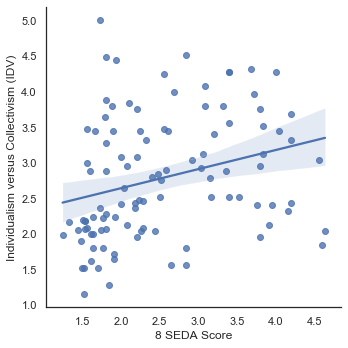

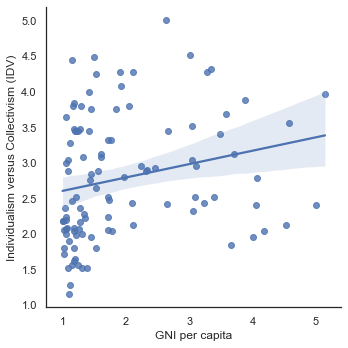

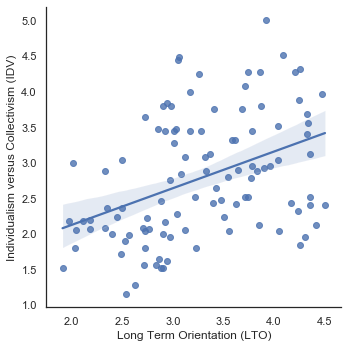

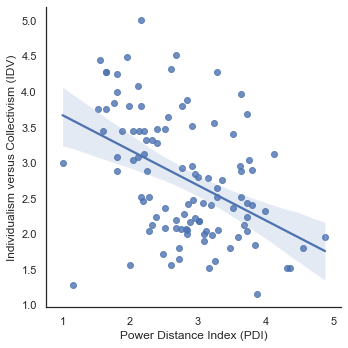

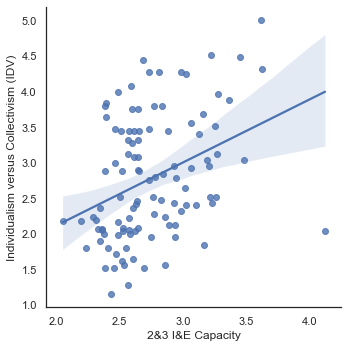

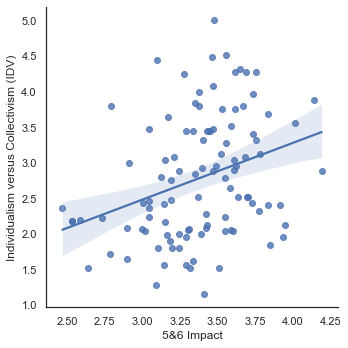

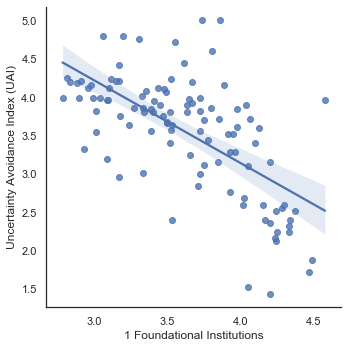

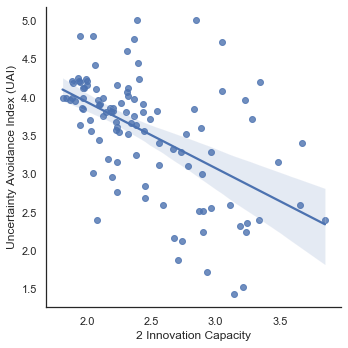

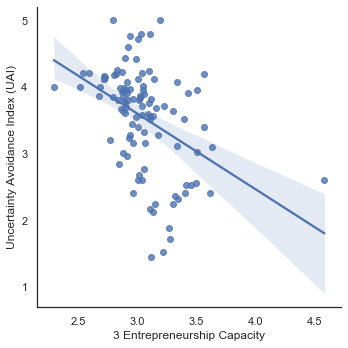

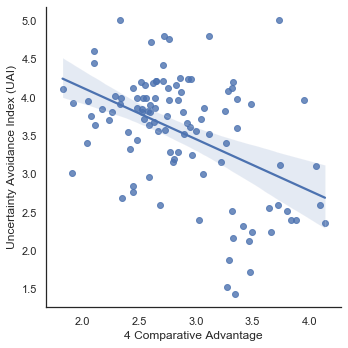

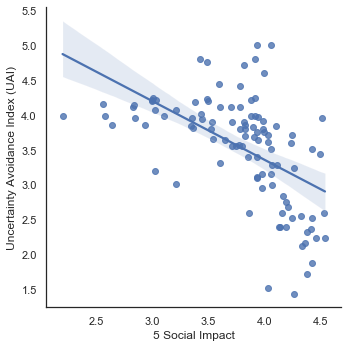

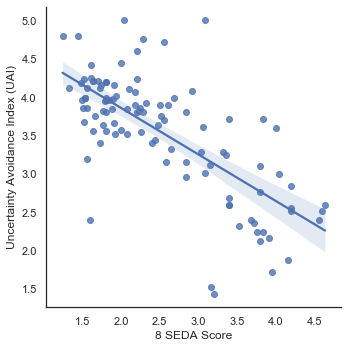

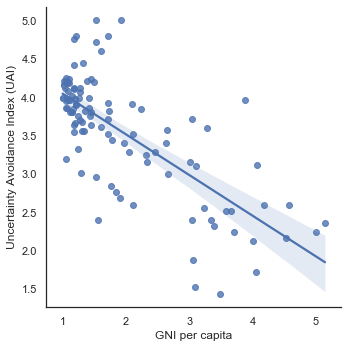

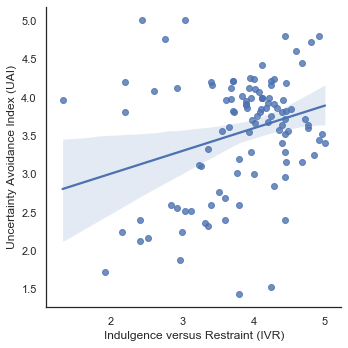

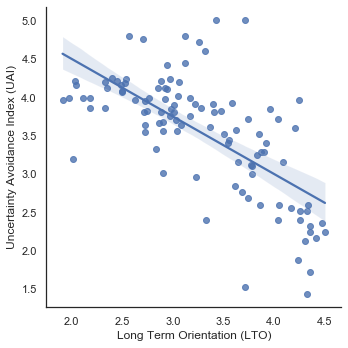

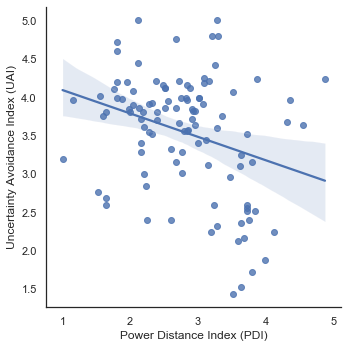

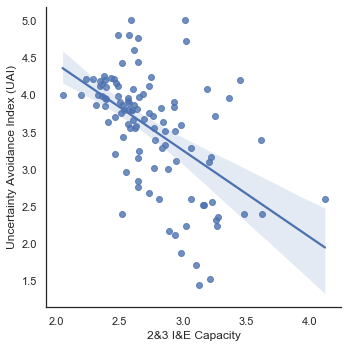

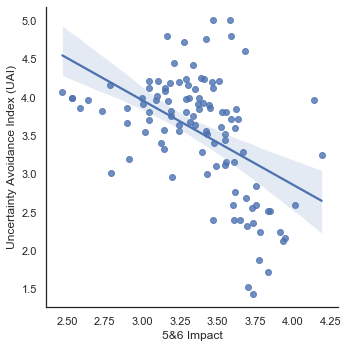

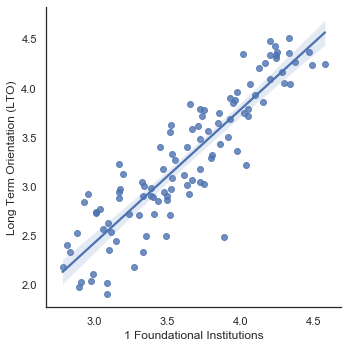

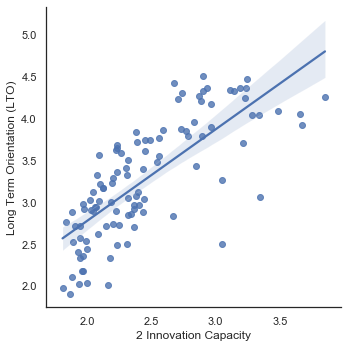

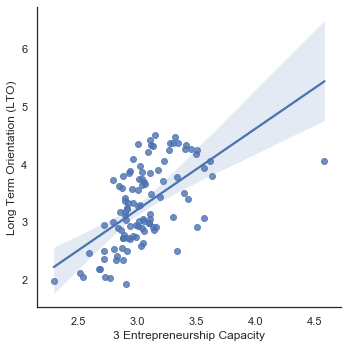

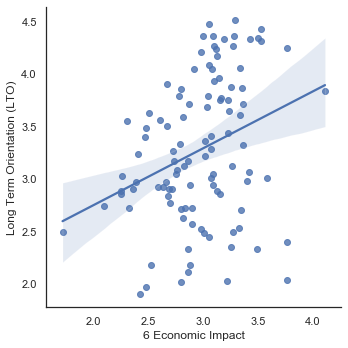

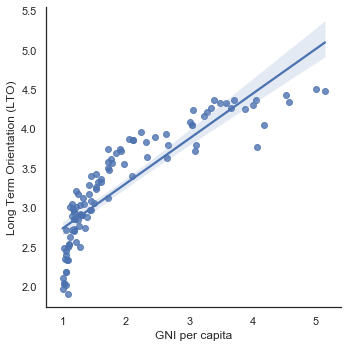

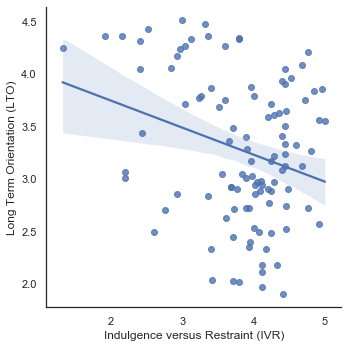

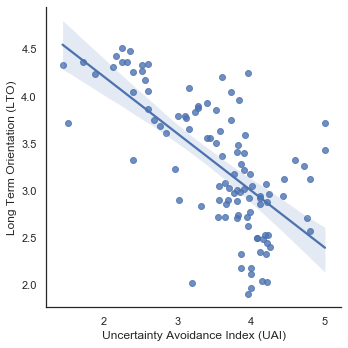

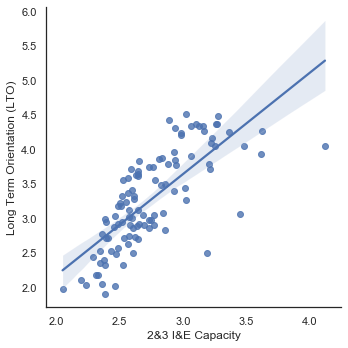

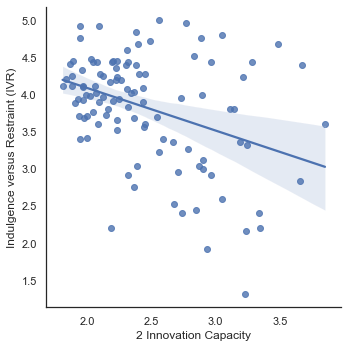

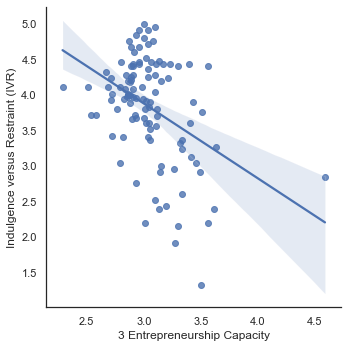

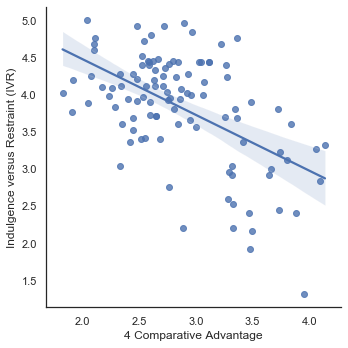

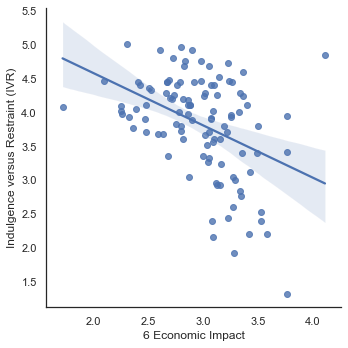

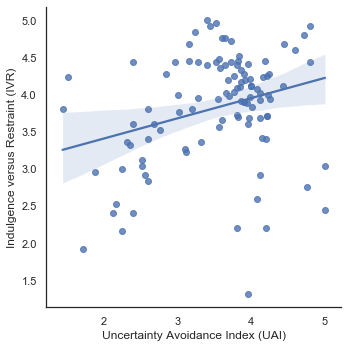

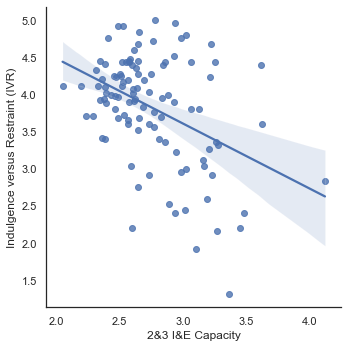

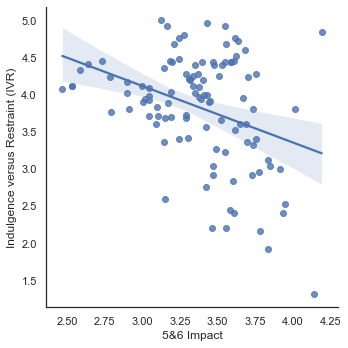

In [115]:
columns = list(i_e_unified.columns)
for c1 in hofstede_pillars:
    print('********')
    print(c1)
    print('********')
    for c2 in columns:
        if c1!=c2 and significant_corr(i_e_unified,i_e_unified,c1,c2)[0]==True:
            #correl = significant_corr(i_e_unified,i_e_unified,c1,c2)
            #print(c2, np.round(correl[1],4), correl[2])
            print_significant_corr(i_e_unified,i_e_unified,c1,c2)
            print('')
            print('')
            print('')

## Parte 6: Correlación de métricas de colaboración con Impacto

Estudiaremos qué correlaciones tienen cada una de las métricas de colaboratividad con aquellas de impacto. 

Para ello, vamos a ordenar los datos de los pilares de Impacto Social y Económico de:
* Argentina
* Brasil
* Chile
* España
* México
* Uruguay

Y vamos a leer la correlación de ambos impactos con cada una de las 11 métricas de colaboratividad con que contamos. Es decir, la métrica original y las 10 propuestas.

In [117]:
# primero conseguimos los datos de los 6 países estudiados
countries={'Mexico':'México',
          'Uruguay':'Uruguay',
          'Spain':'España',
          'Brazil':'Brasil',
          'Argentina':'Argentina',
          'Chile':'Chile'}
df_means_countries_studied = df_means.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)

df1 = df_means_countries_studied[['5 Social Impact', '6 Economic Impact', 'GNI per capita', 'SEDA Score','Power Distance Index (PDI)','Individualism versus Collectivism (IDV)', 
            'Masculinity versus Feminity (MAS)','Uncertainty Avoidance Index (UAI)',
            'Long Term Orientation (LTO)', 
            'Indulgence versus Restraint (IVR)']]

#luego conseguimos el dataframe donde se encuentra la vieja medida de impacto
df_before_impact_split = pd.read_csv('PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#now we obtain colaborativities for each city
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('Ranking_cities.csv')
df3 = df3.loc[df3['Ciudad'].isin(capitals)]
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df = pd.concat([df1, df2, df3], axis=1)
df

5 Social Impact  6 Economic Impact  GNI per capita  SEDA Score  \
México            3.916166           2.665218        1.440818       2.968   
Uruguay           4.495705           2.605598        1.772041       3.560   
España            4.111115           2.675696        2.461763       3.900   
Brasil            3.996738           2.389177        1.426206       2.972   
Argentina         3.984246           2.405071        1.527034       3.232   
Chile             4.424643           2.676299        1.712616       3.504   

           Power Distance Index (PDI)  \
México                           4.24   
Uruguay                          3.44   
España                           3.28   
Brasil                           3.76   
Argentina                        2.96   
Chile                            3.52   

           Individualism versus Collectivism (IDV)  \
México                                        2.20   
Uruguay                                       2.44   
España                                        3.04   
Brasil                                        2.52   
Argentina                                     2.84   
Chile                                         1.92   

           Masculinity versus Feminity (MAS)  \
México                                  3.76   
Uruguay                                 2.52   
España                                  2.68   
Brasil                                  2.96   
Argentina                               3.24   
Chile                                   2.12   

           Uncertainty Avoidance Index (UAI)  Long Term Orientation (LTO)  \
México                                  4.28                         1.96   
Uruguay                                 4.92                         2.04   
España                                  4.44                         2.92   
Brasil                                  4.04                         2.76   
Argentina                               4.44                         1.80   
Chile                                   4.44                         2.24   

           Indulgence versus Restraint (IVR)  Impact Before   Colab 0  \
México                                  4.88       3.725455  3.636191   
Uruguay                                 3.12       4.147576  8.471255   
España                                  2.76       3.864545  4.256043   
Brasil                                  3.36       3.671818  3.258518   
Argentina                               3.48       3.781818  5.773443   
Chile                                   3.72       4.091818  5.571009   

            Colab 1   Colab 2   Colab 3   Colab 4   Colab 5   Colab 6  \
México     0.817118 -0.105809  0.252593  0.165183  0.917916  0.197206   
Uruguay    1.124532  0.452584  0.456651  0.387565  1.019704  0.373899   
España     0.853905 -0.064943  0.297935  0.201023  0.937239  0.228465   
Brasil     0.793642 -0.188052  0.262453  0.168783  0.923994  0.211309   
Argentina  0.921857  0.114574  0.355051  0.252040  0.937550  0.277219   
Chile      0.956748  0.103005  0.360724  0.247697  1.008863  0.271107   

            Colab 7   Colab 8   Colab 9  Colab 10  Colab 11  Colab 12  \
México     0.286659  0.308942  0.304868  0.397667  0.267167  0.266965   
Uruguay    0.349355  0.431910  0.385176  0.588490  0.360937  0.360646   
España     0.287951  0.316629  0.309405  0.426240  0.286349  0.278308   
Brasil     0.255960  0.269424  0.284577  0.384944  0.250892  0.251874   
Argentina  0.322560  0.364099  0.343969  0.492850  0.314246  0.312265   
Chile      0.316215  0.357342  0.340056  0.480988  0.311826  0.293944   

           Colab 13  Colab 14  Colab 10 rescaled  Ranking 0  Ranking 1  \
México     0.342306  0.320264           4.976668          9         10   
Uruguay    0.436381  0.502732           6.884901          2          2   
España     0.353561  0.403647           5.262402          6          9   
Brasil     0.326146  0.295488           4.849443         10         11   
Argentina  0.388024  

In [118]:
impacts = ['5 Social Impact', '6 Economic Impact', 'Impact Before', 'GNI per capita', 'SEDA Score']
others = list(df.columns)
for i in impacts:
    others.remove(i)
    
significants = {x:[] for x in impacts}


df_correls = pd.DataFrame()
df_correls['Correl data'] = others
for i in impacts:
    booleans_i = []
    correls_i = []
    p_vals_i = []
    for c in others:
        triple = significant_corr(df,df,i,c)
        booleans_i.append(triple[0])
        correls_i.append(triple[1])
        p_vals_i.append(triple[2])
        if triple[0]==True:
            significants[i].append(c)
    df_correls['Significant with '+str(i)] = booleans_i
    df_correls['R^2 with '+str(i)] = correls_i
    df_correls['P-value with '+str(i)] = p_vals_i

    
df_correls       

Correl data  Significant with 5 Social Impact  \
0                Power Distance Index (PDI)                             False   
1   Individualism versus Collectivism (IDV)                             False   
2         Masculinity versus Feminity (MAS)                              True   
3         Uncertainty Avoidance Index (UAI)                             False   
4               Long Term Orientation (LTO)                             False   
5         Indulgence versus Restraint (IVR)                             False   
6                                   Colab 0                             False   
7                                   Colab 1                              True   
8                                   Colab 2                             False   
9                                   Colab 3                              True   
10                                  Colab 4                             False   
11                                  Colab 5                              True   
12                                  Colab 6                             False   
13                                  Colab 7                             False   
14                                  Colab 8                             False   
15                                  Colab 9                             False   
16                                 Colab 10                             False   
17                                 Colab 11                             False   
18                                 Colab 12                             False   
19                                 Colab 13                             False   
20                                 Colab 14                             False   
21                        Colab 10 rescaled                             False   
22                                Ranking 0                             False   
23                                Ranking 1                              True   
24                                Ranking 2                             False   
25                                Ranking 3                              True   
26                                Ranking 4                             False   
27                                Ranking 5                              True   
28                                Ranking 6                             False   
29                                Ranking 7                             False   
30                                Ranking 8                             False   
31                                Ranking 9                             False   
32                               Ranking 10                             False   
33                               Ranking 11                             False   
34                               Ranking 12                             False   
35                               Ranking 13                             False   
36                               Ranking 14                             False   
37                    Ranking Colab 10 Resc                             False   
38                       Ranking Capitals 0                             False   
39                       Ranking Capitals 1                              True   
40                       Ranking Capitals 2                             False   
41                       Ranking Capitals 3                              True   
42                       Ranking Capitals 4                             False   
43                       Ranking Capitals 5                              True   
44                       Ranking Capitals 6                             False   
45                       Ranking Capitals 7                             False   
46                       Ranking Capitals 8                             False   
47                       Ranking Capitals 9                             False   
48                      Ranking Capitals 10                    

## Parte 7: Correlación de iEcos con métricas de los grafos

Hacemos lo mismo de arriba, solo que esta vez incluiremos todas las métricas de los grafos, y todas las métricas de iEcosystems. Sin y con unificación de las Capacidades de Innovación y Emprendimiento.

#### Sin unificación

Primero conseguimos 
  *  `df1`: los datos de los 6 países estudiados
  *  `df2`: columna mostrando la medida de impacto anterior a la separación en impacto social y económico
  *  `df3`: información de las colaboratividades de cada ciudad

Y luego, los unificamos en `df`, un DataFrame que seguiremos estudiando.

In [119]:
#DF1 df_means restringido a los 6 paises estudiados
countries={'Mexico':'México', 'Uruguay':'Uruguay', 'Spain':'España', 'Brazil':'Brasil', 'Argentina':'Argentina', 'Chile':'Chile'}
df_means_countries_studied = df_means.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)
df1 = df_means_countries_studied

#DF3 vieja medida de impacto
df_before_impact_split = pd.read_csv('PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#DF3 colaboratividad por ciudad 
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('Ranking_cities.csv')
df3 = df3[['Ciudad', 'País', 'Colab 10', 'Ranking Capitals 10']]
df3 = df3.loc[df3['Ciudad'].isin(capitals)]
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df_i_e_separate = pd.concat([df1, df2, df3], axis=1)
df_i_e_separate

1 Foundational Institutions  2.01 I-Human Capital  2.02 I-Funding  \
México                          3.5224              2.363914        1.238062   
Uruguay                         3.7808              2.346297        1.464989   
España                          3.9268              2.822386        1.899159   
Brasil                          3.1780              1.826706        1.675010   
Argentina                       3.1684              2.021985        1.682002   
Chile                           3.9124              2.399177        1.184934   

           2.03 I-Infrastructure  2.04 I-Demand  2.05 I-Culture & Incentives  \
México                  2.782979       3.102667                       2.5160   
Uruguay                 2.833698       2.578222                       1.2428   
España                  3.191020       3.077333                       3.8300   
Brasil                  2.707140       2.879111                       2.7542   
Argentina               2.740698       2.729778                       1.7930   
Chile                   3.100109       2.965778                       1.9536   

           3.01 E-Human Capital  3.02 E-Funding  3.03 E-Infrastructure  \
México                 3.117368        2.299475               3.701600   
Uruguay                3.046434        2.006035               3.926000   
España                 3.189806        2.423851               4.264933   
Brasil                 2.975761        1.991287               3.694933   
Argentina              3.076940        1.725475               3.679067   
Chile                  4.154179        2.207990               3.935067   

           3.04 E-Demand  3.05 E-Culture & Incentives  \
México            3.4260                     2.953330   
Uruguay           2.7408                     3.051111   
España            3.3650                     2.614589   
Brasil            3.4638                     3.376030   
Argentina         3.1718                     2.891282   
Chile             3.2030                     3.469417   

           4 Comparative Advantage  5 Social Impact  6 Economic Impact  \
México                    2.928133         3.916166           2.665218   
Uruguay                   2.482667         4.495705           2.605598   
España                    2.839333         4.111115           2.675696   
Brasil                    2.741067         3.996738           2.389177   
Argentina                 2.583067         3.984246           2.405071   
Chile                     3.111200         4.424643           2.676299   

           GNI per capita  Individualism versus Collectivism (IDV)  \
México           1.440818                                     2.20   
Uruguay          1.772041                                     2.44   
España           2.461763                                     3.04   
Brasil           1.426206                                     2.52   
Argentina        1.527034                                     2.84   
Chile            1.712616                                     1.92   

           Indulgence versus Restraint (IVR)  Long Term Orientation (LTO)  \
México                                  4.88                         1.96   
Uruguay                                 3.12                         2.04   
España                                  2.76                         2.92   
Brasil                                  3.36                         2.76   
Argentina                               3.48                         1.80   
Chile                                   3.72                         2.24   

           Masculinity versus Feminity (MAS)  Power Distance Index (PDI)  \
México                                  3.76                        4.24   
Uruguay                                 2.52                        3.44   
España                                  2.68                        3.28   
Brasil                                  2.96                        3.76   
Argentina                               

#### Con unificación de innovación y emprendimiento

Primero conseguimos 
  *  `df1`: los datos de los 6 países estudiados, con Innovación y Emprendimiento unificados
  *  `df2`: columna mostrando la medida de impacto anterior a la separación en impacto social y económico
  *  `df3`: información de las colaboratividades de cada ciudad

Y luego, los unificamos en `df`, un DataFrame que seguiremos estudiando.

In [120]:
#DF1 i_e_unified restringido a los 6 paises estudiados
countries={'Mexico':'México', 'Uruguay':'Uruguay', 'Spain':'España', 'Brazil':'Brasil', 'Argentina':'Argentina', 'Chile':'Chile'}
df_means_countries_studied = i_e_unified.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)
df1 = df_means_countries_studied

#DF3 vieja medida de impacto
df_before_impact_split = pd.read_csv('PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#DF3 colaboratividad por ciudad 
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('Ranking_cities.csv')
df3 = df3[['Ciudad', 'País', 'Colab 10', 'Ranking Capitals 10']]  #

for i in range(len(df3['Ranking Capitals 10'])):
    df3['Ranking Capitals 10'][i] *= -1
    df3['Ranking Capitals 10'][i] += 7

df3 = df3.loc[df3['Ciudad'].isin(capitals)]                       #only take capital cities
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country', 'Ranking Capitals 10':'Inverted Ranking Capitals 10'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df_i_e_unified = pd.concat([df1, df2, df3], axis=1)
df_i_e_unified

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/olga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1 Foundational Institutions  2 Innovation Capacity  \
México                          3.5224               2.400724   
Uruguay                         3.7808               2.093201   
España                          3.9268               2.963980   
Brasil                          3.1780               2.368433   
Argentina                       3.1684               2.193493   
Chile                           3.9124               2.320720   

           3 Entrepreneurship Capacity  4 Comparative Advantage  \
México                        3.099555                 2.928133   
Uruguay                       2.954076                 2.482667   
España                        3.171636                 2.839333   
Brasil                        3.100362                 2.741067   
Argentina                     2.908913                 2.583067   
Chile                         3.393930                 3.111200   

           5 Social Impact  6 Economic Impact  8 SEDA Score  GNI per capita  \
México            3.916166           2.665218          2.20        1.440818   
Uruguay           4.495705           2.605598          2.44        1.772041   
España            4.111115           2.675696          3.04        2.461763   
Brasil            3.996738           2.389177          2.52        1.426206   
Argentina         3.984246           2.405071          2.84        1.527034   
Chile             4.424643           2.676299          1.92        1.712616   

           Individualism versus Collectivism (IDV)  \
México                                        1.96   
Uruguay                                       2.04   
España                                        2.92   
Brasil                                        2.76   
Argentina                                     1.80   
Chile                                         2.24   

           Indulgence versus Restraint (IVR)  Long Term Orientation (LTO)  \
México                                  4.28                        2.968   
Uruguay                                 4.92                        3.560   
España                                  4.44                        3.900   
Brasil                                  4.04                        2.972   
Argentina                               4.44                        3.232   
Chile                                   4.44                        3.504   

           Masculinity versus Feminity (MAS)  Power Distance Index (PDI)  \
México                                  3.76                        4.88   
Uruguay                                 2.52                        3.12   
España                                  2.68                        2.76   
Brasil                                  2.96                        3.36   
Argentina                               3.24                        3.48   
Chile                                   2.12                        3.72   

           Uncertainty Avoidance Index (UAI)  2&3 I&E Capacity  5&6 Impact  \
México                                  4.24          2.750139    3.290692   
Uruguay                                 3.44          2.523639    3.550652   
España                                  3.28          3.067808    3.393406   
Brasil                                  3.76          2.734398    3.192957   
Argentina                               2.96          2.551203    3.194659   
Chile                                   3.52          2.857325    3.550471   

           Impact Before  Colab 10  Inverted Ranking Capitals 10  
México          3.725455  0.397667                           2.0  
Uruguay         4.147576  0.588490                           6.0  
España          3.864545  0.426240                           3.0  
Brasil          3.671818  0.384944                           1.0  
Argentina       3.781818  0.492850                           5.0  
Chile           4.091818  0.480988                           4.0

In [125]:
df_i_e_separate
#df_i_e_unified

1 Foundational Institutions  2.01 I-Human Capital  2.02 I-Funding  \
México                          3.5224              2.363914        1.238062   
Uruguay                         3.7808              2.346297        1.464989   
España                          3.9268              2.822386        1.899159   
Brasil                          3.1780              1.826706        1.675010   
Argentina                       3.1684              2.021985        1.682002   
Chile                           3.9124              2.399177        1.184934   

           2.03 I-Infrastructure  2.04 I-Demand  2.05 I-Culture & Incentives  \
México                  2.782979       3.102667                       2.5160   
Uruguay                 2.833698       2.578222                       1.2428   
España                  3.191020       3.077333                       3.8300   
Brasil                  2.707140       2.879111                       2.7542   
Argentina               2.740698       2.729778                       1.7930   
Chile                   3.100109       2.965778                       1.9536   

           3.01 E-Human Capital  3.02 E-Funding  3.03 E-Infrastructure  \
México                 3.117368        2.299475               3.701600   
Uruguay                3.046434        2.006035               3.926000   
España                 3.189806        2.423851               4.264933   
Brasil                 2.975761        1.991287               3.694933   
Argentina              3.076940        1.725475               3.679067   
Chile                  4.154179        2.207990               3.935067   

           3.04 E-Demand  3.05 E-Culture & Incentives  \
México            3.4260                     2.953330   
Uruguay           2.7408                     3.051111   
España            3.3650                     2.614589   
Brasil            3.4638                     3.376030   
Argentina         3.1718                     2.891282   
Chile             3.2030                     3.469417   

           4 Comparative Advantage  5 Social Impact  6 Economic Impact  \
México                    2.928133         3.916166           2.665218   
Uruguay                   2.482667         4.495705           2.605598   
España                    2.839333         4.111115           2.675696   
Brasil                    2.741067         3.996738           2.389177   
Argentina                 2.583067         3.984246           2.405071   
Chile                     3.111200         4.424643           2.676299   

           GNI per capita  Individualism versus Collectivism (IDV)  \
México           1.440818                                     2.20   
Uruguay          1.772041                                     2.44   
España           2.461763                                     3.04   
Brasil           1.426206                                     2.52   
Argentina        1.527034                                     2.84   
Chile            1.712616                                     1.92   

           Indulgence versus Restraint (IVR)  Long Term Orientation (LTO)  \
México                                  4.88                         1.96   
Uruguay                                 3.12                         2.04   
España                                  2.76                         2.92   
Brasil                                  3.36                         2.76   
Argentina                               3.48                         1.80   
Chile                                   3.72                         2.24   

           Masculinity versus Feminity (MAS)  Power Distance Index (PDI)  \
México                                  3.76                        4.24   
Uruguay                                 2.52                        3.44   
España                                  2.68                        3.28   
Brasil                                  2.96                        3.76   
Argentina                               

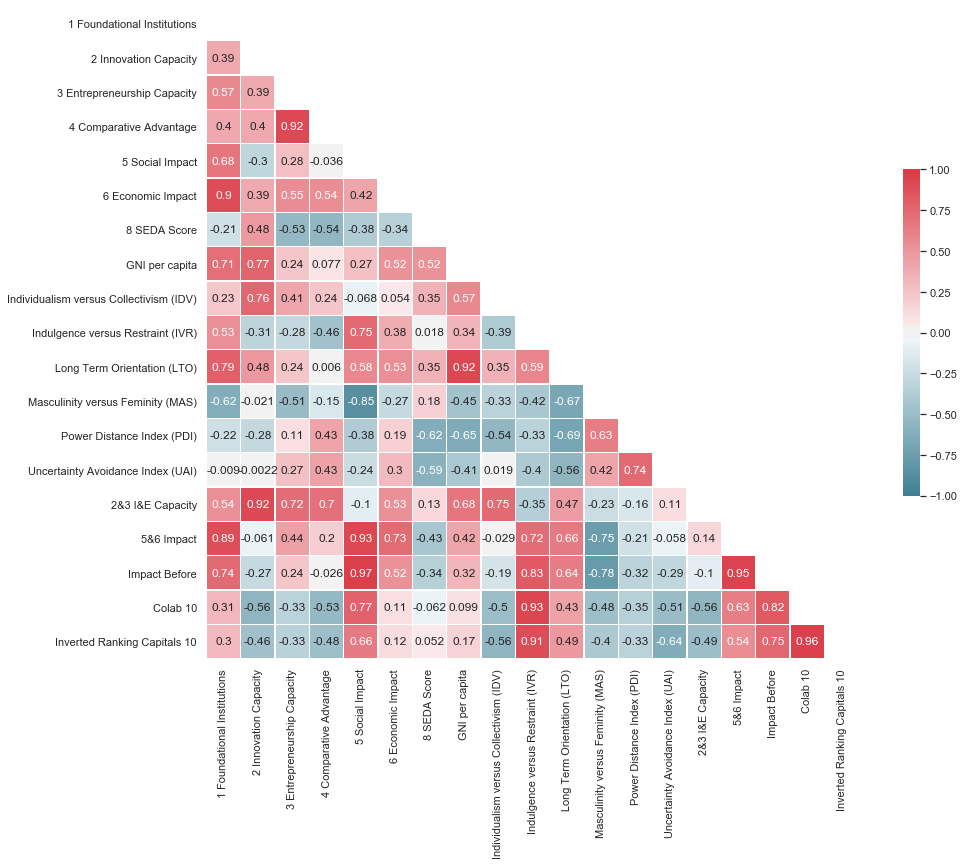

In [94]:
corr = df_i_e_unified.corr()

import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [95]:
all_df=df_i_e_unified.copy()
placeholder=pd.read_csv('Tidy_DataFrame.csv')
capitalnames = ['CDMX', 'CABA', 'Santiago', 'Sao Paulo', 'Madrid', 'Montevideo']
placeholder = placeholder.loc[placeholder['Ciudad'].isin(capitalnames)]

#index: País
placeholder = placeholder.drop('Ciudad',axis=1)
placeholder.set_index('País', inplace=True)

all_df=pd.concat([all_df,placeholder],axis=1)
all_df=all_df.drop('Weighted Degree',axis=1)
all_df=all_df.drop('weight',axis=1)
all_df=all_df.drop('Camino más corto promedio',axis=1)
for i in range(15):
    all_df=all_df.drop('Colab '+str(i),axis=1)
all_df

1 Foundational Institutions  2 Innovation Capacity  \
México                          3.5224               2.400724   
Uruguay                         3.7808               2.093201   
España                          3.9268               2.963980   
Brasil                          3.1780               2.368433   
Argentina                       3.1684               2.193493   
Chile                           3.9124               2.320720   

           3 Entrepreneurship Capacity  4 Comparative Advantage  \
México                        3.099555                 2.928133   
Uruguay                       2.954076                 2.482667   
España                        3.171636                 2.839333   
Brasil                        3.100362                 2.741067   
Argentina                     2.908913                 2.583067   
Chile                         3.393930                 3.111200   

           5 Social Impact  6 Economic Impact  8 SEDA Score  GNI per capita  \
México            3.916166           2.665218          2.20        1.440818   
Uruguay           4.495705           2.605598          2.44        1.772041   
España            4.111115           2.675696          3.04        2.461763   
Brasil            3.996738           2.389177          2.52        1.426206   
Argentina         3.984246           2.405071          2.84        1.527034   
Chile             4.424643           2.676299          1.92        1.712616   

           Individualism versus Collectivism (IDV)  \
México                                        1.96   
Uruguay                                       2.04   
España                                        2.92   
Brasil                                        2.76   
Argentina                                     1.80   
Chile                                         2.24   

           Indulgence versus Restraint (IVR)  Long Term Orientation (LTO)  \
México                                  4.28                        2.968   
Uruguay                                 4.92                        3.560   
España                                  4.44                        3.900   
Brasil                                  4.04                        2.972   
Argentina                               4.44                        3.232   
Chile                                   4.44                        3.504   

           Masculinity versus Feminity (MAS)  Power Distance Index (PDI)  \
México                                  3.76                        4.88   
Uruguay                                 2.52                        3.12   
España                                  2.68                        2.76   
Brasil                                  2.96                        3.36   
Argentina                               3.24                        3.48   
Chile                                   2.12                        3.72   

           Uncertainty Avoidance Index (UAI)  2&3 I&E Capacity  5&6 Impact  \
México                                  4.24          2.750139    3.290692   
Uruguay                                 3.44          2.523639    3.550652   
España                                  3.28          3.067808    3.393406   
Brasil                                  3.76          2.734398    3.192957   
Argentina                               2.96          2.551203    3.194659   
Chile                                   3.52          2.857325    3.550471   

           Impact Before  Inverted Ranking Capitals 10  avg strength  \
México          3.725455                           2.0      3.477388   
Uruguay         4.147576                           6.0      3.227742   
España          3.864545                           3.0      3.518387   
Brasil          3.671818                           1.0      3.430669   
Argentina       3.781818                           5.0      3.244633   
Chile           4.091818                           4.0      3.417211   

             Degree  Excent

In [96]:
corr = all_df.corr()

import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})

Correlation between:  5 Social Impact   and   2.03 I-Infrastructure
**********************************************
Pearson Correlation: 0.777968285140037, p-value: 1.0195615718013568e-22
*Statistically significant*
***********************************************



(True, 0.777968285140037, 1.0195615718013568e-22)

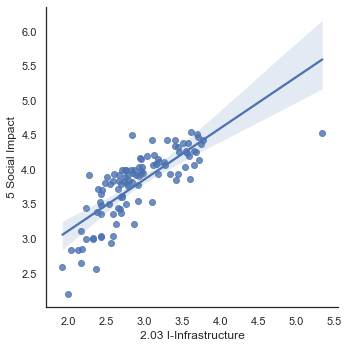

In [97]:
print_significant_corr(df_means, df_means,'5 Social Impact','2.03 I-Infrastructure')

### Correlaciones significativas

Por último en esta sección, vamos a imprimir aquellas correlaciones que son significativas. 

In [71]:
print(list(all_df.columns))

['1 Foundational Institutions', '2 Innovation Capacity', '3 Entrepreneurship Capacity', '4 Comparative Advantage', '5 Social Impact', '6 Economic Impact', '8 SEDA Score', 'GNI per capita', 'Individualism versus Collectivism (IDV)', 'Indulgence versus Restraint (IVR)', 'Long Term Orientation (LTO)', 'Masculinity versus Feminity (MAS)', 'Power Distance Index (PDI)', 'Uncertainty Avoidance Index (UAI)', '2&3 I&E Capacity', '5&6 Impact', 'Impact Before', 'Inverted Ranking Capitals 10', 'avg strength', 'Degree', 'Excentricidad', 'Clustering', 'Diámetro', 'Radio', 'Transitividad', 'Eficiencia Global', 'Small Worldness', 'Rich Club Coefficient', 'Core Ratio', 'Central Point Dominance', 'Spectral radius', 'Modularidad', 'Average Collaborations', 'Colab 10 rescaled']


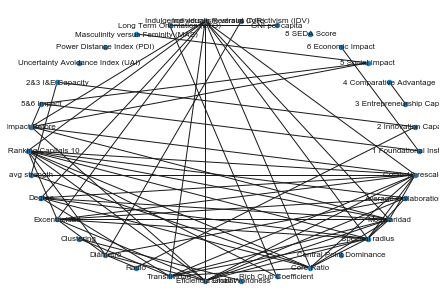

In [70]:
type_dict = {}

def sig_corr_graph(df):
    G = nx.Graph()
    label_dict = dict()
    for c1 in df.columns:
        G.add_node(c1)
        label_dict[c1] = str(c1)
        
    for c1 in df.columns:
        for c2 in df.columns:
            if c1!=c2 and significant_corr(df, df, c1, c2)[0]==True:
                G.add_edge(c1,c2)
    pos = nx.circular_layout(G, scale=1)
    nx.draw(G, pos=pos, node_size=20, labels=label_dict, font_size=8)
    return G

sig_corr_graph(all_df)

Correlation between:  1 Foundational Institutions   and   6 Economic Impact
**********************************************
Pearson Correlation: 0.9043133220626562, p-value: 0.013295859745018155
*Statistically significant*
***********************************************


Correlation between:  2 Innovation Capacity   and   2&3 I&E Capacity
**********************************************
Pearson Correlation: 0.9187875202998865, p-value: 0.009625383179360682
*Statistically significant*
***********************************************


Correlation between:  3 Entrepreneurship Capacity   and   4 Comparative Advantage
**********************************************
Pearson Correlation: 0.9198680484544963, p-value: 0.009374425662405629
*Statistically significant*
***********************************************


Correlation between:  4 Comparative Advantage   and   3 Entrepreneurship Capacity
**********************************************
Pearson Correlation: 0.9198680484544963, p-value: 0.0093

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)



Correlation between:  Inverted Ranking Capitals 10   and   Colab 10
**********************************************
Pearson Correlation: 0.9586677732673268, p-value: 0.002527224433942512
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


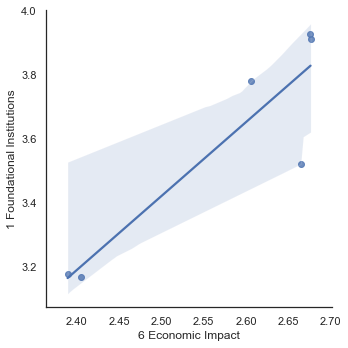

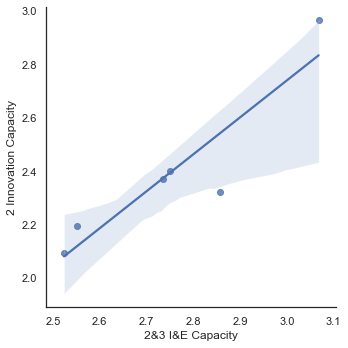

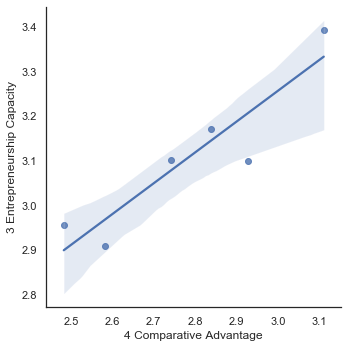

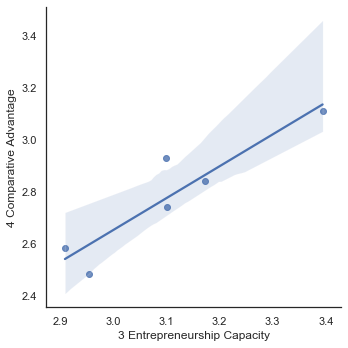

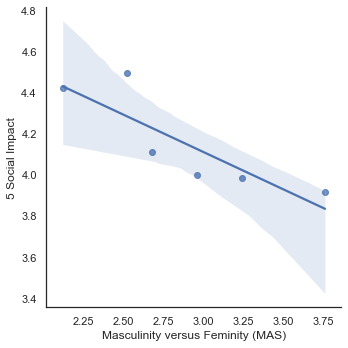

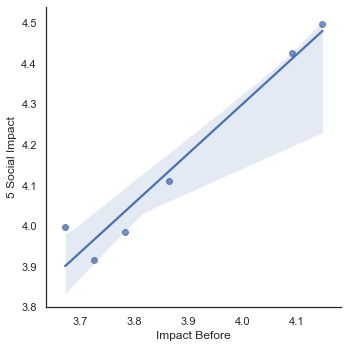

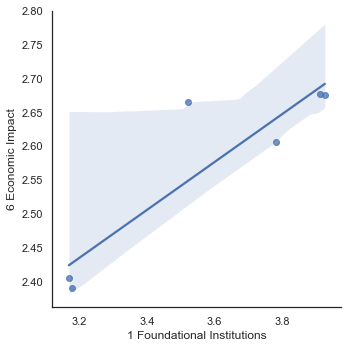

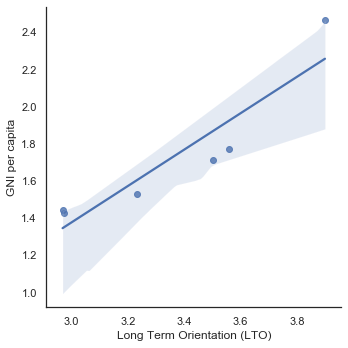

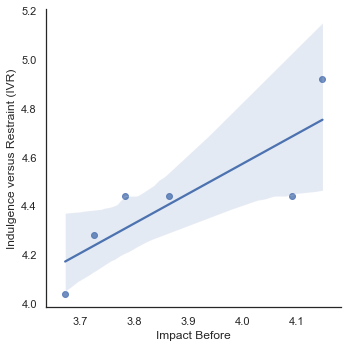

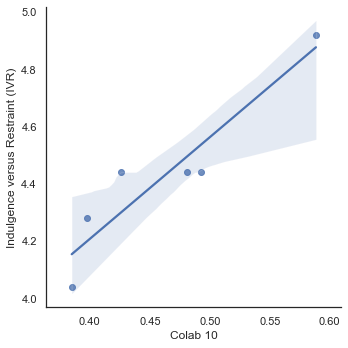

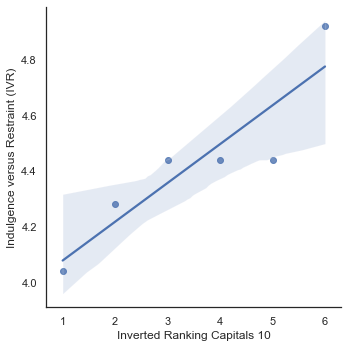

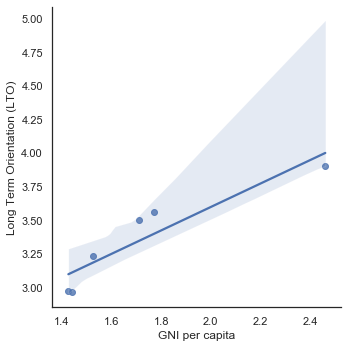

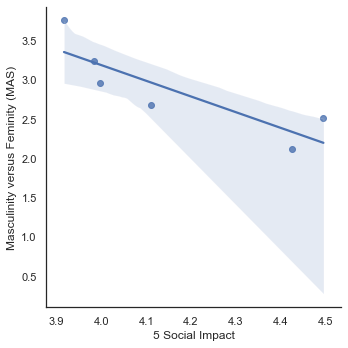

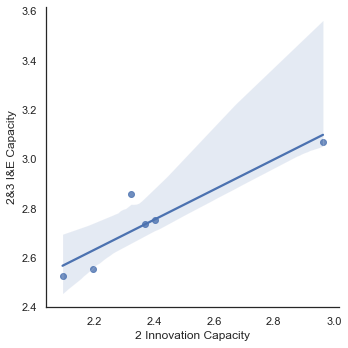

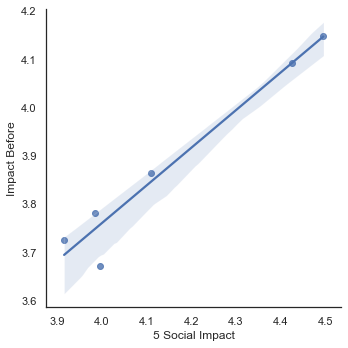

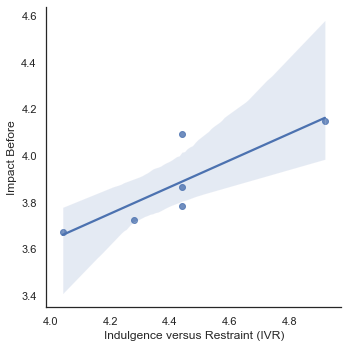

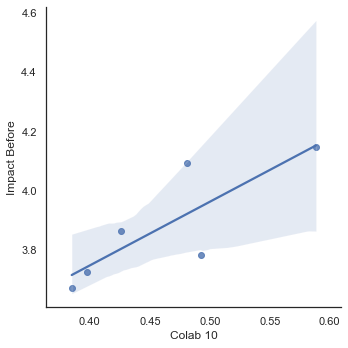

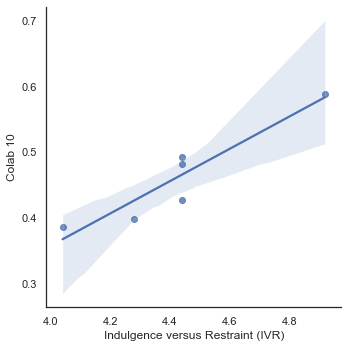

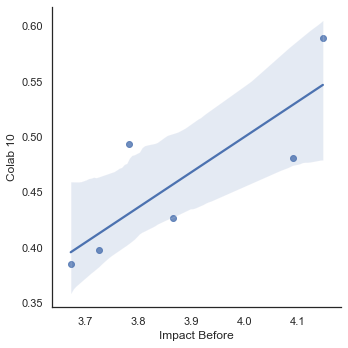

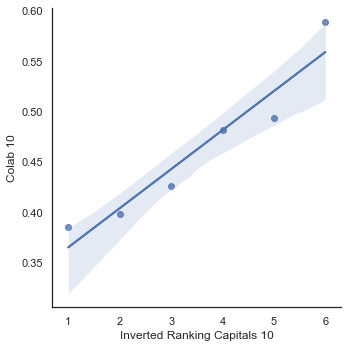

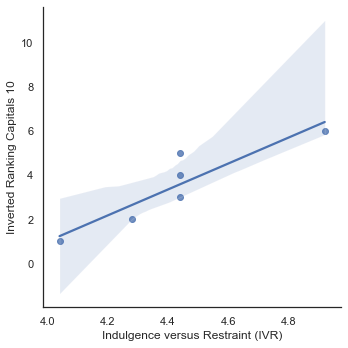

In [158]:
L=list(df_i_e_unified.columns)
for a in L:
    for b in L:
        if a!=b and significant_corr(df_i_e_unified, df_i_e_unified, a, b)[0]==True:
            print_significant_corr(df_i_e_unified, df_i_e_unified, a, b)
            print('')
            


## Part 8: Spider Comparisons

Ahora vamos a hacer visualizaciones tales como mapas de araña para comparar los datos que conocemos de dos capitales. 

In [159]:
#@title Función de spider plot
def make_spider_comparison(df ,country_name1, country_name2):
    from math import pi
    categories=list(df)
    N = len(categories)
  
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    fig = plt.figure(figsize=(8, 8))
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
  
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories )
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4",""], color="grey", size=13)
    plt.ylim(0,5)
  
  
    # ------- PART 2: Add plots
  
    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
  
    # Ind1
    values=df.loc[country_name1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name1)
    ax.fill(angles, values, 'b', alpha=0.1)
  
    # Ind2
    values=df.loc[country_name2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name2)
    ax.fill(angles, values, 'r', alpha=0.1)
  
    # Add legend
    plt.legend( bbox_to_anchor=(0.05, 0.25))
    plt.tight_layout()

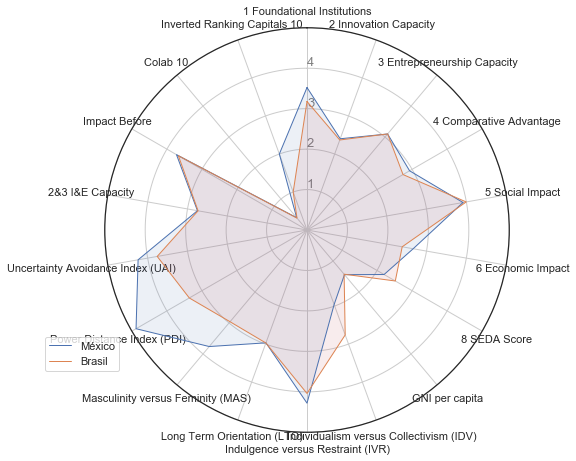

In [165]:
#make_spider_comparison(df_means,'Mexico','Uruguay')
make_spider_comparison(df_i_e_unified,'México','Brasil')

In [166]:
only_iecos = df_means.drop(['GNI per capita','SEDA Score'], axis = 1)
only_iecos

Pillars         1 Foundational Institutions  2.01 I-Human Capital  \
Country                                                             
Albania                              3.4732              2.207633   
Algeria                              3.0096              2.192006   
Argentina                            3.1684              2.021985   
Armenia                              3.6344              2.187459   
Australia                            4.3708              2.878032   
...                                     ...                   ...   
United Kingdom                       4.3396              3.340008   
United States                        4.2960              3.199162   
Uruguay                              3.7808              2.346297   
Vietnam                              3.3420              2.246327   
Zambia                               3.2760              2.210042   

Pillars         2.02 I-Funding  2.03 I-Infrastructure  2.04 I-Demand  \
Country                                                                
Albania               1.337470               2.598926       2.929778   
Algeria               1.674710               2.383803       2.573333   
Argentina             1.682002               2.740698       2.729778   
Armenia               1.398630               2.837184       2.718222   
Australia             2.064750               3.294983       3.268889   
...                        ...                    ...            ...   
United Kingdom        1.967984               3.715226       3.709333   
United States         3.764866               3.606783       4.223556   
Uruguay               1.464989               2.833698       2.578222   
Vietnam               1.419296               2.414585       3.025333   
Zambia                1.368727               2.163111       2.685778   

Pillars         2.05 I-Culture & Incentives  3.01 E-Human Capital  \
Country                                                             
Albania                              1.5660              3.428110   
Algeria                              2.4276              3.182732   
Argentina                            1.7930              3.076940   
Armenia                              1.3420              3.314949   
Australia                            2.8508              3.752603   
...                                     ...                   ...   
United Kingdom                       3.9660              2.853192   
United States                        3.4960              3.722513   
Uruguay                              1.2428              3.046434   
Vietnam                              1.8466              2.495265   
Zambia                               1.3756              2.655574   

Pillars         3.02 E-Funding  3.03 E-Infrastructure  3.04 E-Demand  \
Country                                                                
Albania               2.045130               3.478800         2.3690   
Algeria               1.738879               3.473333         3.2058   
Argentina             1.725475               3.679067         3.1718   
Armenia               2.167727               3.614267         2.6556   
Australia             2.823880               4.229333         3.4370   
...                        ...                    ...            ...   
United Kingdom        3.973914               4.286000         3.8236   
United States         7.088756               4.288533         4.3330   
Uruguay               2.006035               3.926000         2.7408   
Vietnam               2.147998               3.922667         3.2480   
Zambia                2.008592               2.763867         2.3574   

Pillars         3.05 E-Culture & Incentives  4 Comparative Advantage  \
Country                                                                
Albania                            3.133185                 2.074467   
Algeria                            3.351067                 2.399133   
Argentina                          2.89128

## Parte 9: Principal Component Analysis

In [167]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(only_iecos)
print(f"La varianza explicada es: {np.sum(pca.explained_variance_ratio_)} %")


print('')
print('PCA explained variance ratio')
print(pca.explained_variance_ratio_)

La varianza explicada es: 0.6438309886404782 %

PCA explained variance ratio
[0.40777726 0.14377097 0.09228276]


In [168]:
Components_df = pd.DataFrame({
    "Component_1": pca.components_[0],
    "Component_2": pca.components_[1],
    "Component_3": pca.components_[2],
    "Pilar" : only_iecos.columns})
Components_df.set_index('Pilar',inplace=True)

Components_df

Component_1  Component_2  Component_3
Pilar                                                                         
1 Foundational Institutions                 0.222799     0.003666    -0.128837
2.01 I-Human Capital                        0.246716     0.012619    -0.010214
2.02 I-Funding                              0.268126     0.127543     0.168100
2.03 I-Infrastructure                       0.253892    -0.029135    -0.120600
2.04 I-Demand                               0.191597    -0.018500     0.170829
2.05 I-Culture & Incentives                 0.275966     0.252698     0.507721
3.01 E-Human Capital                       -0.029480    -0.064913     0.025617
3.02 E-Funding                              0.245064    -0.122160     0.080909
3.03 E-Infrastructure                       0.241301     0.044787    -0.086108
3.04 E-Demand                               0.188147     0.014402     0.328570
3.05 E-Culture & Incentives                -0.039766    -0.096200     0.088252
4 Comparative Advantage                     0.212529    -0.159249     0.181209
5 Social Impact                             0.195262    -0.018866    -0.199386
6 Economic Impact                           0.075174    -0.002752    -0.031819
Individualism versus Collectivism (IDV)     0.441176    -0.085435    -0.266119
Indulgence versus Restraint (IVR)           0.112515    -0.599590     0.137706
Long Term Orientation (LTO)                 0.211117     0.660310    -0.206638
Masculinity versus Feminity (MAS)           0.020275     0.088920     0.389396
Power Distance Index (PDI)                 -0.317413     0.208363     0.355460
Uncertainty Avoidance Index (UAI)          -0.205343     0.089695    -0.197741

In [169]:
#aquí podemos observar en el primer componente, cuáles métricas contribuyen más/menos
Components_df['Component_1'].sort_values(ascending=False)

Pilar
Individualism versus Collectivism (IDV)    0.441176
2.05 I-Culture & Incentives                0.275966
2.02 I-Funding                             0.268126
2.03 I-Infrastructure                      0.253892
2.01 I-Human Capital                       0.246716
3.02 E-Funding                             0.245064
3.03 E-Infrastructure                      0.241301
1 Foundational Institutions                0.222799
4 Comparative Advantage                    0.212529
Long Term Orientation (LTO)                0.211117
5 Social Impact                            0.195262
2.04 I-Demand                              0.191597
3.04 E-Demand                              0.188147
Indulgence versus Restraint (IVR)          0.112515
6 Economic Impact                          0.075174
Masculinity versus Feminity (MAS)          0.020275
3.01 E-Human Capital                      -0.029480
3.05 E-Culture & Incentives               -0.039766
Uncertainty Avoidance Index (UAI)         -0.205343
Power 

In [170]:
#mismo para el segundo componente
Components_df['Component_2'].sort_values(ascending=False)

Pilar
Long Term Orientation (LTO)                0.660310
2.05 I-Culture & Incentives                0.252698
Power Distance Index (PDI)                 0.208363
2.02 I-Funding                             0.127543
Uncertainty Avoidance Index (UAI)          0.089695
Masculinity versus Feminity (MAS)          0.088920
3.03 E-Infrastructure                      0.044787
3.04 E-Demand                              0.014402
2.01 I-Human Capital                       0.012619
1 Foundational Institutions                0.003666
6 Economic Impact                         -0.002752
2.04 I-Demand                             -0.018500
5 Social Impact                           -0.018866
2.03 I-Infrastructure                     -0.029135
3.01 E-Human Capital                      -0.064913
Individualism versus Collectivism (IDV)   -0.085435
3.05 E-Culture & Incentives               -0.096200
3.02 E-Funding                            -0.122160
4 Comparative Advantage                   -0.159249
Indulg

In [ ]:
#mismo, para el tercer componente
Components_df['Component_3'].sort_values(ascending=False)

In [ ]:
Scores = pca.transform(only_iecos)
Score_df = pd.DataFrame({
    "Component_1":Scores[:,0],
    "Component_2": Scores[:,1],
    "Component_3": Scores[:,2],
    "Country" :df.index,
    "Region" :df['Region'],
    "Development" : df['Development Stage']
})

Score_df

In [ ]:
%pip install plotly==4.9.0
import plotly.express as px

In [ ]:
#fig = px.scatter_3d(Score_df, x='Component_1', y='Component_2', z='Component_3', color='Development', text='Country')
#fig.show()

## Buscando parejas de métricas correlacionadas significativamente

In [ ]:
iecosystems_m=['1 Foundational Institutions', '2.01 I-Human Capital', '2.02 I-Funding', '2.03 I-Infrastructure', '2.04 I-Demand',
      '2.05 I-Culture & Incentives', '3.01 E-Human Capital', '3.02 E-Funding', '3.03 E-Infrastructure', '3.04 E-Demand', 
      '3.05 E-Culture & Incentives', '4 Comparative Advantage', '5 Impact']

global_m=['avg strength', 'weight', 'Degree', 'Weighted Degree', 'Eccentricidad', 'Clustering',
          'Diámetro', 'Radio', 'Camino más corto promedio', 'Transitividad', 'Eficiencia Global', 
          'Small Worldness', 'Core Ratio', 'Central Point Dominance', 'Spectral radius']

significant_pairs=[]
for a in iecosystems_m:
    for b in global_m:
        if check_corr_significance(df_graph_ieco, df_graph_ieco, a, b)[0]:
            significant_pairs.append((a,b))

significant_pairs


In [ ]:
df_graph_ieco_with_detail = pd.concat([df_imputed,Graph_df], axis = 1)
df_graph_ieco_with_detail

In [ ]:
i_funding_components = ['2.02a R&D expenditure as a % GDP (UNESCO)',
                       '2.02b R&D expenditure in \'000 current PPP$ (UNESCO)',
                       '2.02c Public R&D Expenditure as % of total R&D expenditure (UNESCO)',
                       '2.02d Business Expenditure as % of total R&D expenditure (UNESCO)']

e_funding_components = ['3.02a VC investment',
                       '3.02b Financing of SME\'s (GCI 4.0)',
                       '3.02c Venture Capital Availability (GCI 4.0)',
                       '3.02d Ease of Credit (GII)',
                       '3.02e VC deals (GII)',
                       '3.02f Venture Capital Deal Volume']

comparative_advantage_components = ['4.01 State of cluster development (GCI 4.0)',
                                   '4.02 Country capacity to attract and retain talent']

impact_components = ['5.01 GDP per capita',
                    '5.02 Social Progress Index',
                    '5.03 Inclusive Development Index',
                    '5.04 Population below international poverty line (SDG 1 - No poverty)',
                    '5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)',
                    '5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth)',
                    '5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth)',
                    '5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure)',
                    '5.09 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities)',
                    '5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities)',
                    '5.11 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production)']

collab_metrics = Graph_df.columns.values.tolist()
collab_metrics = collab_metrics[-16:]


In [ ]:
# ---
# correlations between I Funding and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    

In [ ]:
# ---
# correlations between E Funding and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))


for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between I Funding and Impact
# ---


significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between E Funding and Impact
# ---


significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between Colaboration and Impact
# ---


significant_positives = []
significant_negatives = []

for a in collab_metrics:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between Colaboration and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in collab_metrics:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
Graph_df

In [ ]:
#-------------------------------------------
# Scaling 1-5 parameters per country
#-------------------------------------------


negative_type_metrics = ['Eccentricidad', 'Diámetro', 'Radio', 
                         'Camino más corto promedio', 'Central Point Dominance', 'Spectral radius']

Graph_df_copy=Graph_df.copy()

mins = {metric: min(Graph_df[metric].to_list()) for metric in list(Graph_df)}
maxs = {metric: max(Graph_df[metric].to_list()) for metric in list(Graph_df)}


# Proceso de re-escalamiento de 0 a 1
for col in Graph_df_copy.columns:
    Graph_df_copy[col] = Graph_df_copy[col].apply(lambda x: (x-mins[col])/(maxs[col]-mins[col]))

# Rescalamiento de 1 a 5    
Graph_df_copy = np.round((Graph_df_copy*4)+1,2)

# Invertimos la escala de aquellas métricas de tipo negativo
for col in negative_type_metrics:
    Graph_df_copy[col] = Graph_df_copy[col].apply(lambda x: abs(5-x)+1)

Graph_df_copy


In [ ]:
#-------------------------------------------
# Spider Web visualization of each country
#-------------------------------------------

countries=['México', 'España', 'Uruguay', 'Brasil', 'Chile', 'Argentina']

for country1 in countries:
    for country2 in countries:
        if country1==country2:
            make_spider_comparison(Graph_df_copy,country1,country2)
            